<a href="https://colab.research.google.com/github/charleanems/retail_analysis/blob/main/retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/charleanems/datasets/main/train.csv')

# Data Understanding and Preparation

Source: https://www.kaggle.com/rohitsahoo/sales-forecasting

## Exploring Dataset

In [ ]:
# first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# last 5 rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
# size of rows and columns
df.shape

(9800, 18)

In [ ]:
# getting further details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# summary statistics numerical features
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
# summary statistics categorical features
df.describe(include=object)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [ ]:
# skewness of the dataset
df.skew()

Row ID          0.000000
Postal Code    -0.131295
Sales          12.983483
dtype: float64

In [ ]:
# kurtosis of the dataset
df.kurt()

Row ID          -1.200000
Postal Code     -1.492676
Sales          304.445088
dtype: float64

## Duplicates Values

In [ ]:
# checking duplicate values
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales]
Index: []


## Missing Values

In [ ]:
# checking missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:
# calculating the proportion of missing values
print(df.isnull().sum() * 100 / len(df))

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64


In [ ]:
# checking missing values of Postal Code column
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
# Inputting the Postal Code
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [ ]:
# checking missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


## Irrelevant data

In [ ]:
# checking columns
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [ ]:
# dropping unnecessary columns
df.drop(columns = ['Row ID', 'Country'], inplace = True)

In [ ]:
# checking columns
list(df.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

## Syntax Errors

In [ ]:
# viewing all columns
list(df.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [ ]:
# renaming column names
df = df.rename(columns={'Order ID':'Order_ID', 'Order Date':'Order_Date', 
                        'Ship Date':'Ship_Date','Ship Mode':'Ship_Mode', 
                        'Customer ID':'Customer_ID', 'Customer Name':'Customer_Name', 
                        'Product ID': 'Product_ID', 'Sub-Category':'Sub_Category', 
                        'Product Name':'Product_Name'})

In [ ]:
# viewing all columns
list(df.columns)

['Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product_ID',
 'Category',
 'Sub_Category',
 'Product_Name',
 'Sales']

In [ ]:
# checking features type
df.dtypes

Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer_Name     object
Segment           object
City              object
State             object
Postal Code      float64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
dtype: object

In [ ]:
# converting values into datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

In [ ]:
# converting values into datetime type
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

In [ ]:
# checking features type
df.dtypes

Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
dtype: object

In [ ]:
# ordering dataset in chronological order
df.sort_values(by=['Order_Date'], inplace=True, ascending=True)
df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


## Exploring Features

In [ ]:
# checking features data type 
df.dtypes

Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
dtype: object

In [ ]:
# checking the number of observations per feature
df.count()

Order_ID         9800
Order_Date       9800
Ship_Date        9800
Ship_Mode        9800
Customer_ID      9800
Customer_Name    9800
Segment          9800
City             9800
State            9800
Postal Code      9800
Region           9800
Product_ID       9800
Category         9800
Sub_Category     9800
Product_Name     9800
Sales            9800
dtype: int64

In [ ]:
# counting Order_ID feature unique values
df.Order_ID.nunique()

4922

In [ ]:
# verifying Order_ID feature values
df.Order_ID.unique()

array(['CA-2015-103800', 'CA-2015-112326', 'CA-2015-141817', ...,
       'CA-2018-143259', 'CA-2018-126221', 'CA-2018-156720'], dtype=object)

In [ ]:
# displaying elements of Order_ID feature and their frequency
print(df.groupby('Order_ID').size())

Order_ID
CA-2015-100006    1
CA-2015-100090    2
CA-2015-100293    1
CA-2015-100328    1
CA-2015-100363    2
                 ..
US-2018-168802    1
US-2018-169320    2
US-2018-169488    2
US-2018-169502    2
US-2018-169551    6
Length: 4922, dtype: int64


In [ ]:
# creating a subset by sum up by Order_ID and Sales features
df_order_id = df.groupby('Order_ID')[['Sales']].sum().reset_index()
df_order_id

,Order_ID,Sales
0,CA-2015-100006,377.970
1,CA-2015-100090,699.192
2,CA-2015-100293,91.056
3,CA-2015-100328,3.928
4,CA-2015-100363,21.376
...,...,...
4917,US-2018-168802,18.368
4918,US-2018-169320,171.430
4919,US-2018-169488,56.860
4920,US-2018-169502,113.410


In [ ]:
# counting Order_Date feature unique values
df.Order_Date.nunique()

1230

In [ ]:
# verifying Order_Date feature values
df.Order_Date.unique()

array(['2015-01-03T00:00:00.000000000', '2015-01-04T00:00:00.000000000',
       '2015-01-05T00:00:00.000000000', ...,
       '2018-12-28T00:00:00.000000000', '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# displaying elements of Order_Date feature and their frequency
print(df.groupby('Order_Date').size())

Order_Date
2015-01-03     1
2015-01-04     3
2015-01-05     1
2015-01-06     9
2015-01-07     2
              ..
2018-12-26     4
2018-12-27     2
2018-12-28    19
2018-12-29    12
2018-12-30     7
Length: 1230, dtype: int64


In [ ]:
# creating a DataFrame by sum up by Order_Date and Sales features
df_order_date = df.groupby('Order_Date')[['Sales']].sum().reset_index()
df_order_date

,Order_Date,Sales
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


In [ ]:
# counting Ship_Date feature unique values
df.Ship_Date.nunique()

1326

In [ ]:
# verifying Ship_Date feature values
df.Ship_Date.unique()

array(['2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-12T00:00:00.000000000', ...,
       '2019-01-02T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# displaying elements of Ship_Date feature and their frequency
print(df.groupby('Ship_Date').size())

Ship_Date
2015-01-07     2
2015-01-08     4
2015-01-10     7
2015-01-12     3
2015-01-13     2
              ..
2019-01-01    20
2019-01-02     8
2019-01-03     7
2019-01-04     5
2019-01-05     2
Length: 1326, dtype: int64


In [ ]:
# creating a subset by sum up by Ship_Date and Sales features
df_ship_date = df.groupby('Ship_Date')[['Sales']].sum().reset_index()
df_ship_date

,Ship_Date,Sales
0,2015-01-07,29.2280
1,2015-01-08,307.5000
2,2015-01-10,4374.8800
3,2015-01-12,106.6940
4,2015-01-13,40.5440
...,...,...
1321,2019-01-01,2390.1548
1322,2019-01-02,1545.6240
1323,2019-01-03,569.2740
1324,2019-01-04,344.2240


In [ ]:
# counting Ship_Mode feature unique values
df.Ship_Mode.nunique()

4

In [ ]:
# verifying Ship_Mode feature values
df.Ship_Mode.unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
# displaying elements of Ship_Mode feature and their frequency
print(df.groupby('Ship_Mode').size())

Ship_Mode
First Class       1501
Same Day           538
Second Class      1902
Standard Class    5859
dtype: int64


In [ ]:
# creating a subset by sum up by Ship Mode and Sales features
df_ship_mode = df.groupby('Ship_Mode')[['Sales']].sum().reset_index()
df_ship_mode

,Ship_Mode,Sales
0,First Class,3.455723e+05
1,Same Day,1.252190e+05
2,Second Class,4.499142e+05
3,Standard Class,1.340831e+06


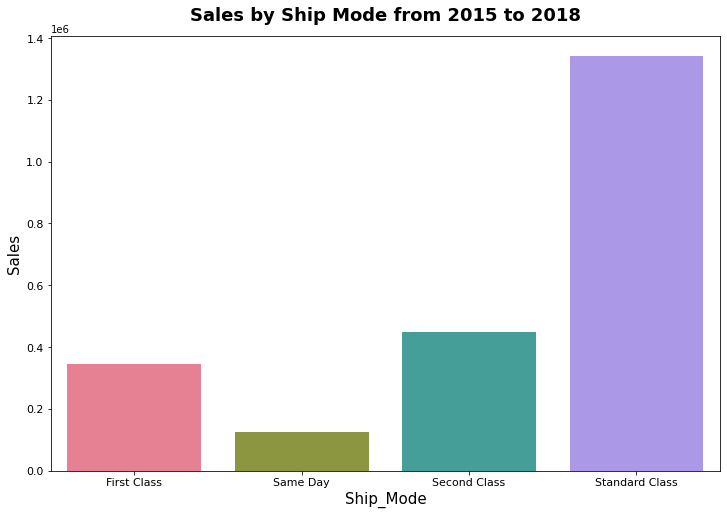

In [ ]:
# plotting df_ship_mode subset

# plot size
fig, ax = plt.subplots(figsize=(12, 8))

# setting the bar plot
ax = sns.barplot(x='Ship_Mode', y='Sales', data=df_ship_mode, palette='husl')

# setting title, labels and ticks
ax.set_title('Sales by Ship Mode from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('Ship_Mode', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

In [ ]:
# counting Customer_ID feature unique values
df.Customer_ID.nunique()

793

In [ ]:
# verifying Customer_ID feature values
df.Customer_ID.unique()

array(['DP-13000', 'PO-19195', 'MB-18085', 'ME-17320', 'LS-17230',
       'JO-15145', 'VS-21820', 'MS-17830', 'AJ-10780', 'SV-20365',
       'CS-12250', 'MM-17920', 'ND-18370', 'BD-11605', 'BS-11590',
       'EH-13990', 'DL-13315', 'DW-13195', 'TS-21340', 'HL-15040',
       'XP-21865', 'MM-18280', 'MV-17485', 'IM-15055', 'CA-11965',
       'SD-20485', 'EJ-13720', 'JC-15340', 'MV-18190', 'LC-17050',
       'BD-11500', 'CD-12790', 'EB-13930', 'TB-21400', 'DB-13270',
       'MH-17440', 'ND-18460', 'CK-12760', 'NM-18445', 'NF-18385',
       'GA-14725', 'SC-20095', 'ML-17395', 'ST-20530', 'BF-11020',
       'MN-17935', 'AB-10015', 'TB-21595', 'SR-20740', 'LC-16930',
       'TM-21010', 'SA-20830', 'MG-17875', 'JH-15430', 'JS-16030',
       'SC-20380', 'HR-14770', 'GW-14605', 'DB-13060', 'VF-21715',
       'KN-16705', 'AJ-10945', 'JS-15595', 'SC-20020', 'EJ-14155',
       'AP-10720', 'CL-12565', 'AB-10150', 'NP-18685', 'CM-12715',
       'KT-16480', 'SW-20275', 'RB-19435', 'CK-12205', 'KA-165

In [ ]:
# displaying elements of Customer_ID feature and their frequency
print(df.groupby('Customer_ID').size())

Customer_ID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Length: 793, dtype: int64


In [ ]:
# creating a subset by sum up by Customer_ID and Sales features
df_customer_id = df.groupby('Customer_ID')[['Sales']].sum().reset_index()
df_customer_id

,Customer_ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156
...,...,...
788,XP-21865,2374.658
789,YC-21895,5454.350
790,YS-21880,6720.444
791,ZC-21910,8025.707


In [ ]:
# counting Customer_Name feature unique values
df.Customer_Name.nunique()

793

In [ ]:
# verifying Customer_Name feature values
df.Customer_Name.unique()

array(['Darren Powers', 'Phillina Ober', 'Mick Brown', 'Maria Etezadi',
       'Lycoris Saunders', "Jack O'Briant", 'Vivek Sundaresam',
       'Melanie Seite', 'Anthony Jacobs', 'Seth Vernon',
       'Chris Selesnick', 'Michael Moore', 'Natalie DeCherney',
       'Brian Dahlen', 'Brendan Sweed', 'Erica Hackney',
       'Delfina Latchford', 'David Wiener', 'Toby Swindell',
       'Hunter Lopez', 'Xylona Preis', 'Muhammed MacIntyre',
       'Mark Van Huff', 'Ionia McGrath', 'Carol Adams', 'Shirley Daniels',
       'Ed Jacobs', 'Jasper Cacioppo', 'Mike Vittorini', 'Liz Carlisle',
       'Bradley Drucker', 'Cynthia Delaney', 'Eric Barreto',
       'Tom Boeckenhauer', 'Deborah Brumfield', 'Mark Haberlin',
       'Neil Ducich', 'Cyma Kinney', 'Nathan Mautz', 'Natalie Fritzler',
       'Guy Armstrong', 'Sanjit Chand', 'Marina Lichtenstein', 'Shui Tom',
       'Barry Französisch', 'Michael Nguyen', 'Aaron Bergman',
       'Troy Blackwell', 'Steven Roelle', 'Linda Cazamias',
       'Tamara Mann

In [ ]:
# displaying elements of Customer_Name feature and their frequency
print(df.groupby('Customer_Name').size())

Customer_Name
Aaron Bergman          6
Aaron Hawkins         11
Aaron Smayling        10
Adam Bellavance       18
Adam Hart             20
                      ..
Xylona Preis          28
Yana Sorensen         12
Yoseph Carroll         8
Zuschuss Carroll      31
Zuschuss Donatelli     9
Length: 793, dtype: int64


In [ ]:
# creating a subset by sum up by Customer_Name and Sales features
df_customer_name = df.groupby('Customer_Name')[['Sales']].sum().reset_index()
df_customer_name

,Customer_Name,Sales
0,Aaron Bergman,886.156
1,Aaron Hawkins,1744.700
2,Aaron Smayling,3050.692
3,Adam Bellavance,7755.620
4,Adam Hart,3250.337
...,...,...
788,Xylona Preis,2374.658
789,Yana Sorensen,6720.444
790,Yoseph Carroll,5454.350
791,Zuschuss Carroll,8025.707


In [ ]:
# counting Segment feature unique values
df.Segment.nunique()

3

In [ ]:
# verifying Segment feature values
df.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [ ]:
# displaying elements of Segment feature and their frequency
print(df.groupby('Segment').size())

Segment
Consumer       5101
Corporate      2953
Home Office    1746
dtype: int64


In [ ]:
# creating a subset by sum up by Segment and Sales features
df_segment = df.groupby('Segment')[['Sales']].sum().reset_index()
df_segment

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


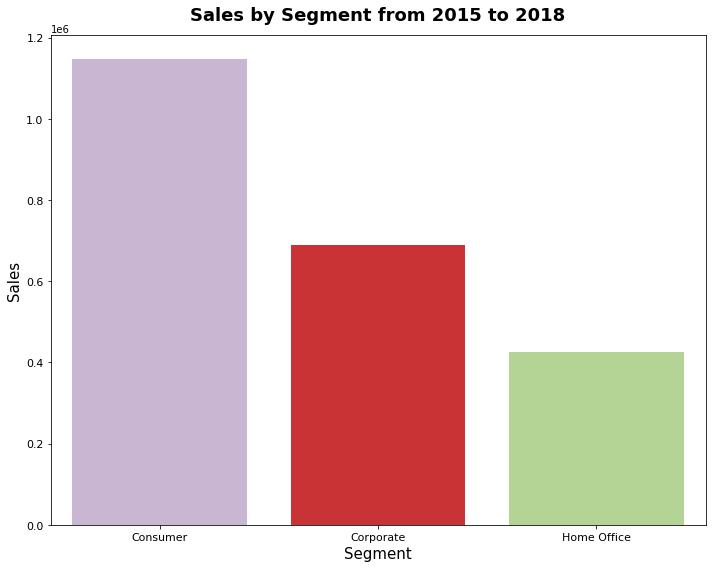

In [ ]:
# plotting df_segment subset

# plot size
fig, ax = plt.subplots(figsize=(10, 8))

# setting the bar plot
ax = sns.barplot(x='Segment', y='Sales', data=df_segment, palette='Paired_r')

# setting title, labels and ticks
ax.set_title('Sales by Segment from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('Segment', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# counting City feature unique values
df.City.nunique()

529

In [ ]:
# verifying City feature values
df.City.unique()

array(['Houston', 'Naperville', 'Philadelphia', 'Henderson',
       'Los Angeles', 'Athens', 'Huntsville', 'Laredo', 'Springfield',
       'Dover', 'Bossier City', 'Newark', 'Mount Pleasant',
       'San Francisco', 'Roswell', 'Scottsdale', 'Jonesboro', 'Westland',
       'Smyrna', 'Las Vegas', 'Rapid City', 'Alexandria', 'San Diego',
       'New York City', 'Detroit', 'Mission Viejo', 'Green Bay',
       'Saint Petersburg', 'Seattle', 'Escondido', 'Romeoville',
       'Chesapeake', 'Linden', 'North Las Vegas', 'Columbia', 'Concord',
       'Dallas', 'Chicago', 'Arlington', 'Lubbock', 'Richmond',
       'Woodstock', 'Moreno Valley', 'El Paso', 'Medford', 'Columbus',
       'Elmhurst', 'Wilmington', 'Margate', 'Yonkers', 'Des Moines',
       'Denver', 'Royal Oak', 'Roseville', 'Logan', 'Jacksonville',
       'Huntington Beach', 'Tampa', 'Raleigh', 'Jackson', 'Lakeville',
       'Burbank', 'Lakeland', 'Knoxville', 'Hamilton', 'Asheville',
       'Tucson', 'Greensboro', 'Portage', 'Delray

In [ ]:
# displaying elements of City feature and their frequency
print(df.groupby('City').size())

City
Aberdeen        1
Abilene         1
Akron          20
Albuquerque    14
Alexandria     16
               ..
Woonsocket      4
Yonkers        15
York            5
Yucaipa         1
Yuma            4
Length: 529, dtype: int64


In [ ]:
# creating a subset by sum up by City and Sales features
df_city = df.groupby('City')[['Sales']].sum().reset_index()
df_city

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


In [ ]:
# counting State feature unique values
df.State.nunique()

49

In [ ]:
# verifying State feature values
df.State.unique()

array(['Texas', 'Illinois', 'Pennsylvania', 'Kentucky', 'California',
       'Georgia', 'Virginia', 'Delaware', 'Louisiana', 'Ohio',
       'South Carolina', 'Oregon', 'Arizona', 'Arkansas', 'Michigan',
       'Tennessee', 'Nevada', 'South Dakota', 'New York', 'Wisconsin',
       'Florida', 'Washington', 'New Jersey', 'Missouri', 'Indiana',
       'North Carolina', 'Colorado', 'Utah', 'Mississippi', 'Minnesota',
       'Iowa', 'New Mexico', 'Massachusetts', 'Alabama', 'Montana',
       'Idaho', 'Maryland', 'Connecticut', 'New Hampshire', 'Oklahoma',
       'Nebraska', 'Maine', 'Kansas', 'Rhode Island',
       'District of Columbia', 'Vermont', 'Wyoming', 'North Dakota',
       'West Virginia'], dtype=object)

In [ ]:
# displaying elements of State feature and their frequency
print(df.groupby('State').size())

State
Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7
Ohio                     454
Oklahoma

In [ ]:
# creating a subset by sum up by State and Sales features
df_state= df.groupby('State')[['Sales']].sum().reset_index()
df_state

,State,Sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


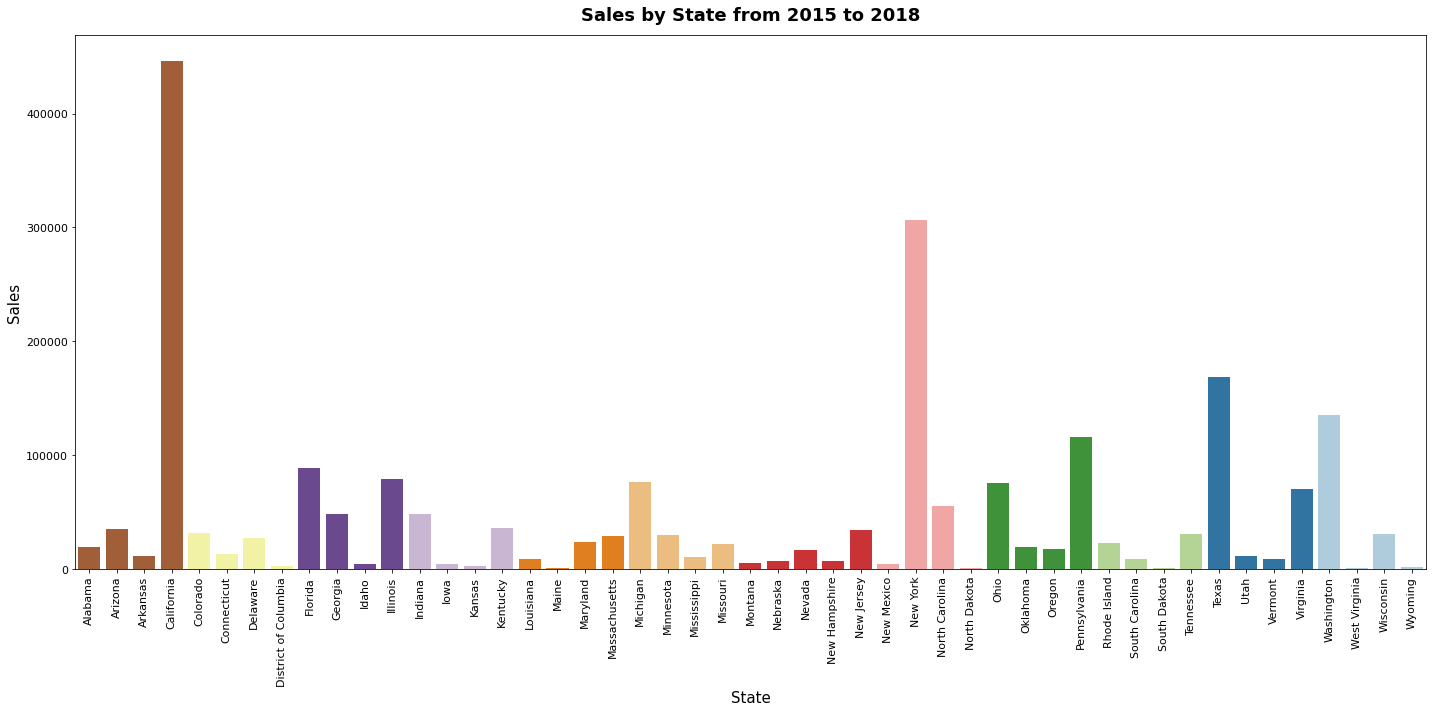

In [ ]:
# plotting df_state subset

# plot size
fig, ax = plt.subplots(figsize=(20, 10))

# setting the bar plot
ax = sns.barplot(x='State', y='Sales', data=df_state, palette='Paired_r')

# setting title, labels and ticks
ax.set_title('Sales by State from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# counting Region feature unique values
df.Region.nunique()

4

In [ ]:
# verifying Region feature values
df.Region.unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [ ]:
# displaying elements of Region feature and their frequency
print(df.groupby('Region').size())

Region
Central    2277
East       2785
South      1598
West       3140
dtype: int64


In [ ]:
# creating a subset by sum up by Region and Sales features
df_region = df.groupby('Region')[['Sales']].sum().reset_index()
df_region

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


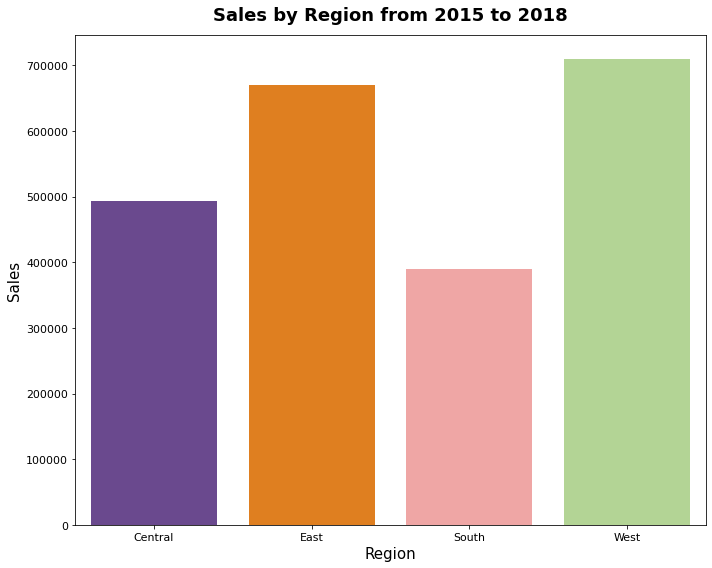

In [ ]:
# plotting df_region subset

# plot size
fig, ax = plt.subplots(figsize=(10, 8))

# setting the bar plot
ax = sns.barplot(x='Region', y='Sales', data=df_region, palette='Paired_r')

# setting title, labels and ticks
ax.set_title('Sales by Region from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# counting Product_ID feature unique values
df.Product_ID.nunique()

1861

In [ ]:
# verifying Product_ID feature values
df.Product_ID.unique()

array(['OFF-PA-10000174', 'OFF-BI-10004094', 'OFF-ST-10002743', ...,
       'TEC-MA-10001856', 'FUR-BO-10002206', 'OFF-FA-10000089'],
      dtype=object)

In [ ]:
# displaying elements of Product_ID feature and their frequency
print(df.groupby('Product_ID').size())

Product_ID
FUR-BO-10000112    1
FUR-BO-10000330    3
FUR-BO-10000362    5
FUR-BO-10000468    6
FUR-BO-10000711    2
                  ..
TEC-PH-10004912    2
TEC-PH-10004922    5
TEC-PH-10004924    3
TEC-PH-10004959    2
TEC-PH-10004977    9
Length: 1861, dtype: int64


In [ ]:
# creating a subset by sum up by Product_ID and Sales features
df_product_id = df.groupby('Product_ID')[['Sales']].sum().reset_index()
df_product_id

,Product_ID,Sales
0,FUR-BO-10000112,825.174
1,FUR-BO-10000330,1064.624
2,FUR-BO-10000362,2154.348
3,FUR-BO-10000468,723.842
4,FUR-BO-10000711,851.760
...,...,...
1856,TEC-PH-10004912,351.680
1857,TEC-PH-10004922,1085.238
1858,TEC-PH-10004924,56.164
1859,TEC-PH-10004959,341.666


In [ ]:
# counting Category feature unique values
df.Category.nunique()

3

In [ ]:
# verifying Category feature values
df.Category.unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [ ]:
# displaying elements of Category feature and their frequency
print(df.groupby('Category').size())

Category
Furniture          2078
Office Supplies    5909
Technology         1813
dtype: int64


In [ ]:
# creating a subset by sum up by Category and Sales features
df_category = df.groupby('Category')[['Sales']].sum().reset_index()
df_category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


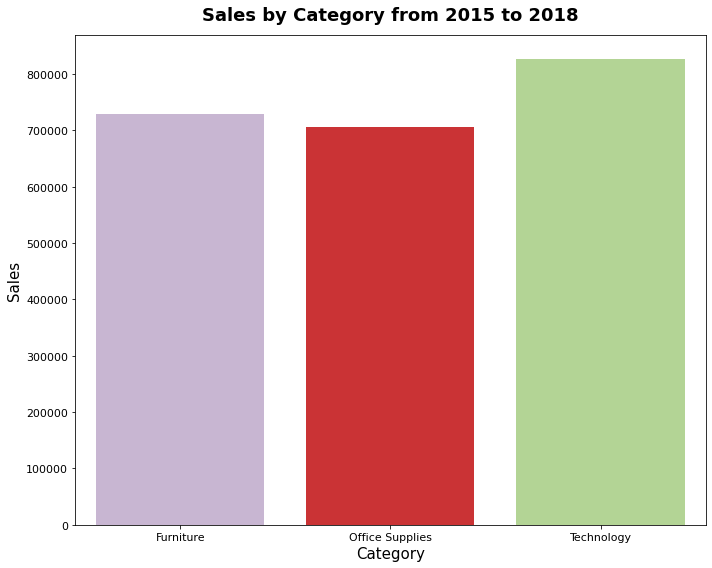

In [ ]:
# plotting df_category subset

# plot size
fig, ax = plt.subplots(figsize=(10, 8))

# setting the bar plot
ax = sns.barplot(x='Category', y='Sales', data=df_category, palette='Paired_r')

# setting title, labels and ticks
ax.set_title('Sales by Category from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# counting Sub_Category feature unique values
df.Sub_Category.nunique()

17

In [ ]:
# verifying Sub_Category feature values
df.Sub_Category.unique()

array(['Paper', 'Binders', 'Storage', 'Labels', 'Art', 'Phones', 'Chairs',
       'Fasteners', 'Furnishings', 'Accessories', 'Envelopes',
       'Bookcases', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
# displaying elements of Sub_Category feature and their frequency
print(df.groupby('Sub_Category').size())

Sub_Category
Accessories     756
Appliances      459
Art             785
Binders        1492
Bookcases       226
Chairs          607
Copiers          66
Envelopes       248
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1338
Phones          876
Storage         832
Supplies        184
Tables          314
dtype: int64


In [ ]:
# creating a subset by sum up by Sub_Category and Sales features
df_sub_category = df.groupby('Sub_Category')[['Sales']].sum().reset_index()
df_sub_category

,Sub_Category,Sales
0,Accessories,164186.7000
1,Appliances,104618.4030
2,Art,26705.4100
3,Binders,200028.7850
4,Bookcases,113813.1987
5,Chairs,322822.7310
6,Copiers,146248.0940
7,Envelopes,16128.0460
8,Fasteners,3001.9600
9,Furnishings,89212.0180


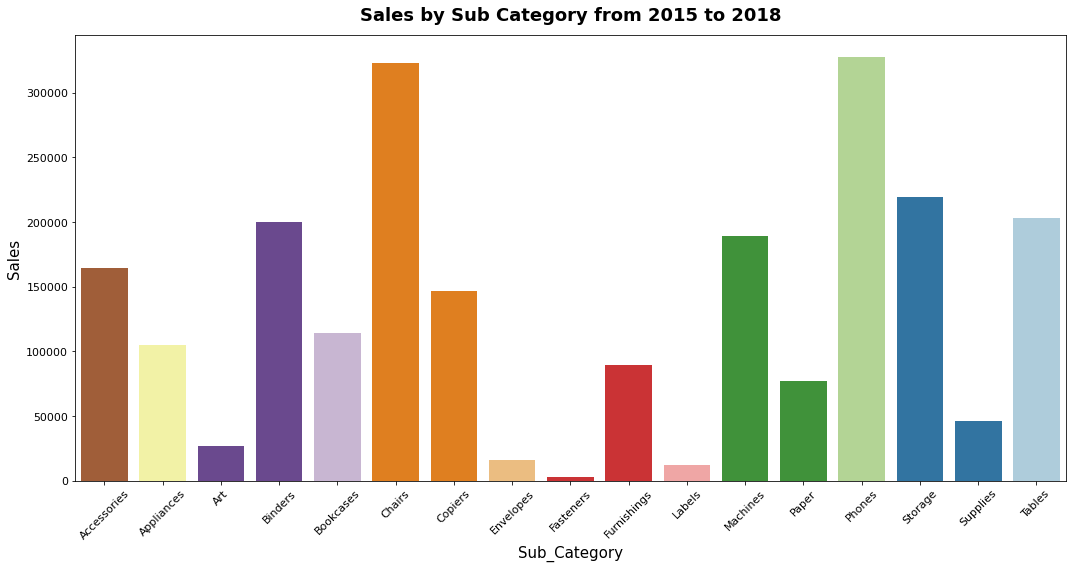

In [ ]:
# plotting df_sub_category subset

# plot size
fig, ax = plt.subplots(figsize=(15, 8))

# setting the bar plot
ax = sns.barplot(x='Sub_Category', y='Sales', data=df_sub_category, palette='Paired_r')

# setting title, labels and ticks
ax.set_title('Sales by Sub Category from 2015 to 2018', fontsize=18, color='black', pad=15, weight='bold')
ax.set_xlabel('Sub_Category', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# counting Product_Name feature unique values
df.Product_Name.nunique()

1849

In [ ]:
# verifying Product_Name feature values
df.Product_Name.unique()

array(['Message Book, Wirebound, Four 5 1/2" X 4" Forms/Pg., 200 Dupl. Sets/Book',
       'GBC Standard Plastic Binding Systems Combs',
       'SAFCO Boltless Steel Shelving', ...,
       'Panasonic Business\xa0Telephones\xa0KX-T7736',
       'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order',
       'Acco Glide Clips'], dtype=object)

In [ ]:
# displaying elements of Product_Name feature and their frequency
print(df.groupby('Product_Name').size())

Product_Name
"While you Were Out" Message Book, One Form per Page                                                    3
#10 Gummed Flap White Envelopes, 100/Box                                                                4
#10 Self-Seal White Envelopes                                                                           4
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              6
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                10
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     5
iOttie HLCRIO102 Car Mount                                                                              5
iOttie XL Car Mount                                                                                     2
invisibleSHIELD by ZAGG Smudge-Fr

In [ ]:
# creating a subset by sum up by Product_Name and Sales features
df_product_name = df.groupby('Product_Name')[['Sales']].sum().reset_index()
df_product_name

,Product_Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
1844,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
1845,iOttie HLCRIO102 Car Mount,215.892
1846,iOttie XL Car Mount,223.888
1847,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [ ]:
# counting Sales feature unique values
df.Sales.nunique()

5757

In [ ]:
# verifying Sales feature values
df.Sales.unique()

array([ 16.448,   3.54 , 272.736, ..., 209.3  ,  52.776,   3.024])

In [ ]:
# displaying elements of Sales feature and their frequency
print(df.groupby('Sales').size())

Sales
0.444        1
0.556        1
0.836        1
0.852        1
0.876        1
            ..
10499.970    1
11199.968    1
13999.960    1
17499.950    1
22638.480    1
Length: 5757, dtype: int64


# Data Visualisation

In [ ]:
# creating new columns - Year_Month, Year, Month, Day and Week_Day
df['Year_Month'] = df['Order_Date'].apply(lambda x: x.strftime("%Y-%m"))
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month_name()
df['Day'] = df['Order_Date'].dt.day_name()
df['Week_Day'] = df.Order_Date.dt.weekday

# displaying 5 first rows
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year_Month,Year,Month,Day,Week_Day
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01,2015,January,Saturday,5
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01,2015,January,Sunday,6
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01,2015,January,Sunday,6
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01,2015,January,Sunday,6
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01,2015,January,Monday,0


In [ ]:
df.dtypes

Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Year_Month               object
Year                      int64
Month                    object
Day                      object
Week_Day                  int64
dtype: object

## Bar Plot

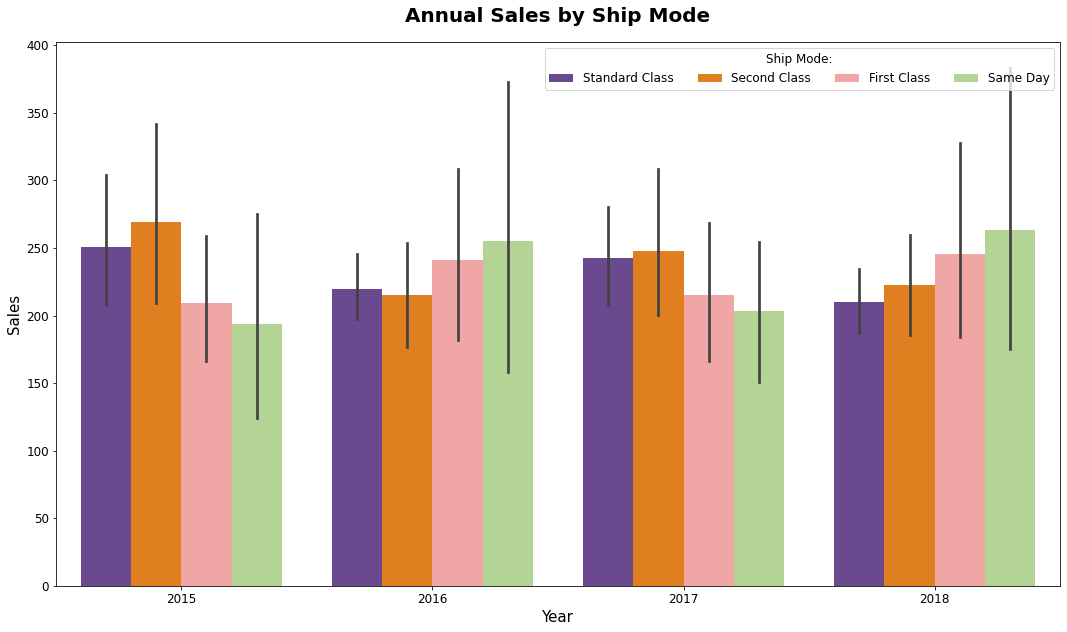

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.barplot(x='Year', y='Sales', hue='Ship_Mode', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Annual Sales by Ship Mode', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Ship Mode:', title_fontsize=12, loc='upper right', ncol=4, fontsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

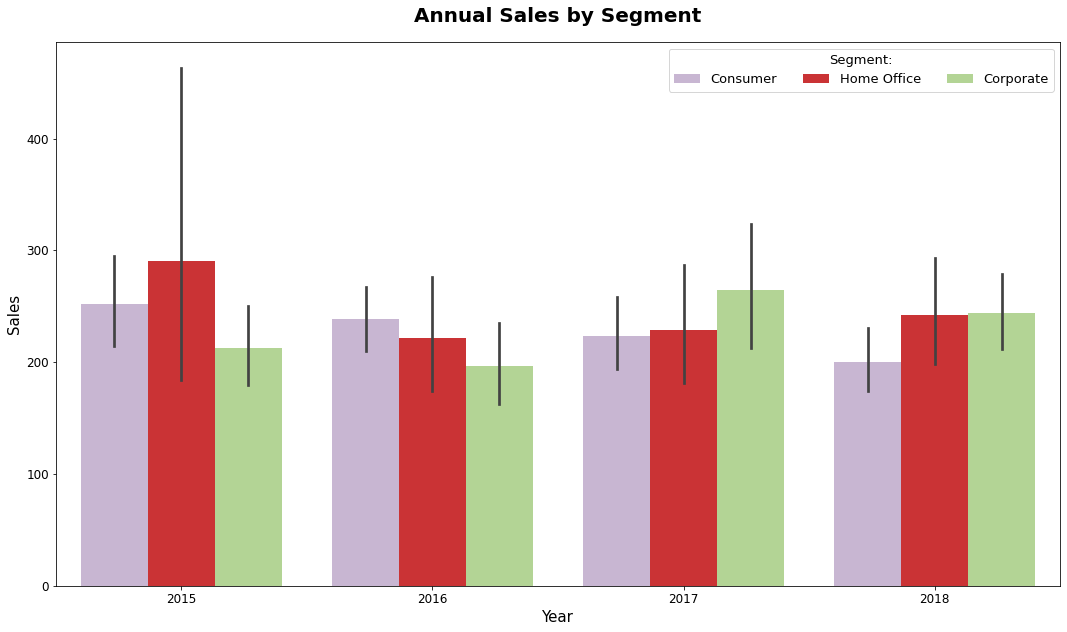

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.barplot(x='Year', y='Sales', hue='Segment', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Annual Sales by Segment', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Segment:', title_fontsize=13, loc='upper right', ncol=3, fontsize=13)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

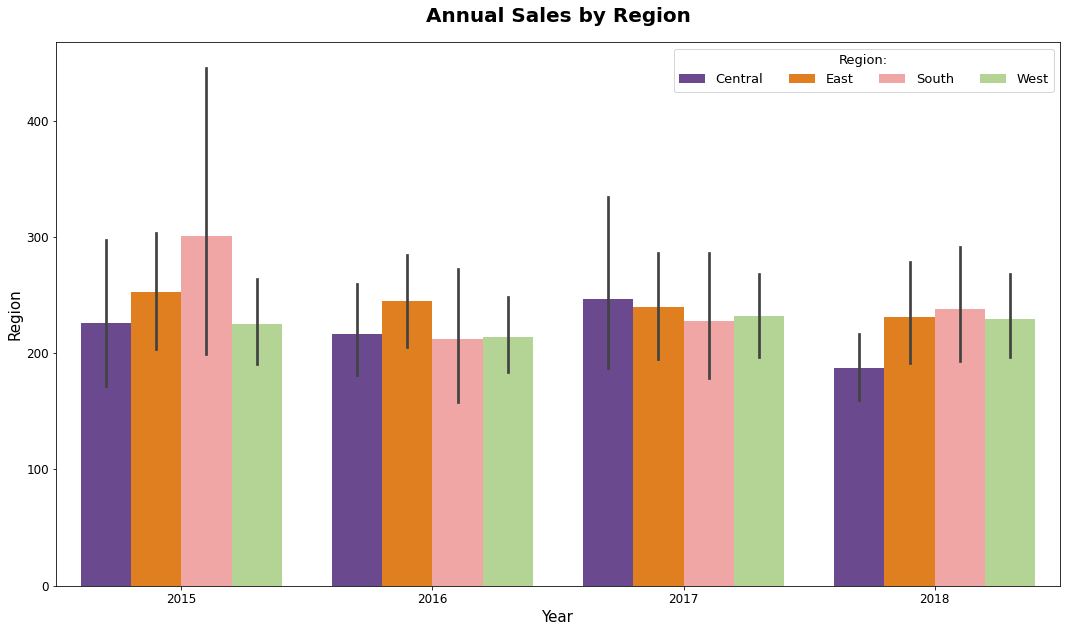

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.barplot(x='Year', y='Sales', hue='Region', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Annual Sales by Region', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Region:', title_fontsize=13, loc='upper right', ncol=4, fontsize=13)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Region', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

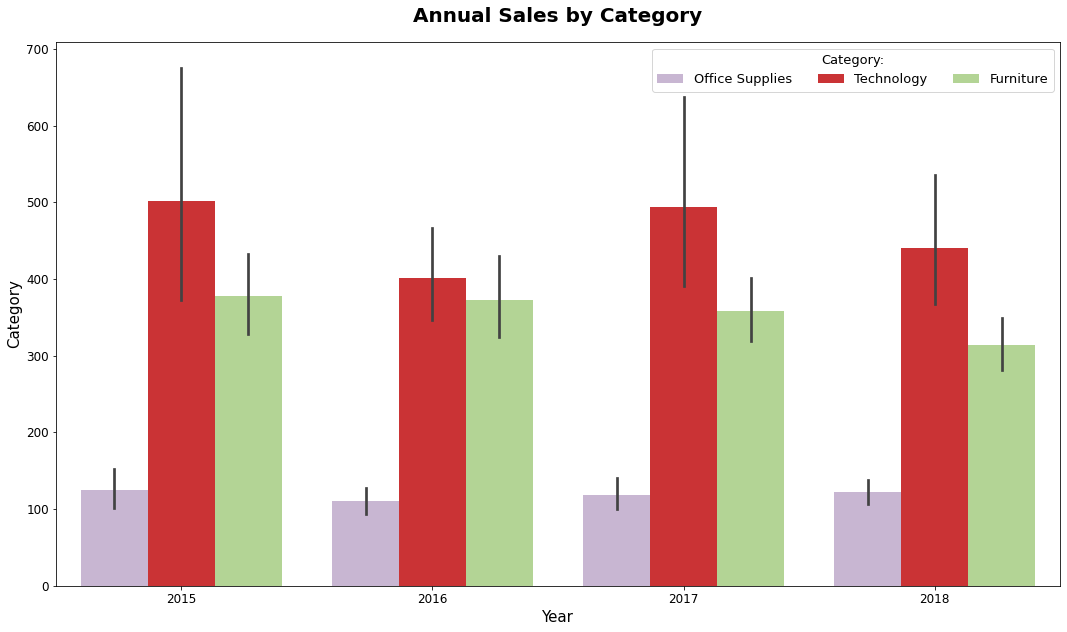

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.barplot(x='Year', y='Sales', hue='Category', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Annual Sales by Category', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Category:', title_fontsize=13, loc='upper right', ncol=4, fontsize=13)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Category', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

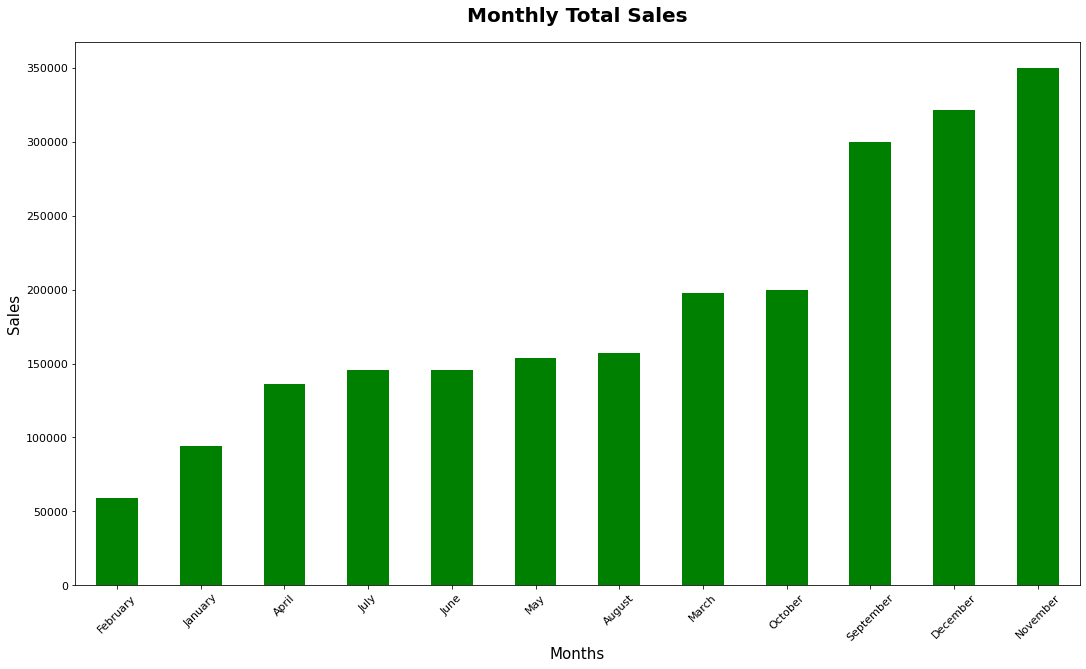

In [ ]:
# grouping dataset by month and total Sales
group_month = df.groupby(by='Month').sum()['Sales']
group_month = group_month.sort_values()

# setting bar and line plots
group_month.plot(kind='bar', figsize=(18, 10), color='g', label='Total Sales')

# setting title, labels and ticks
plt.title('Monthly Total Sales', fontsize=20, pad=20, color='black', weight='bold')
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

## Count Plot

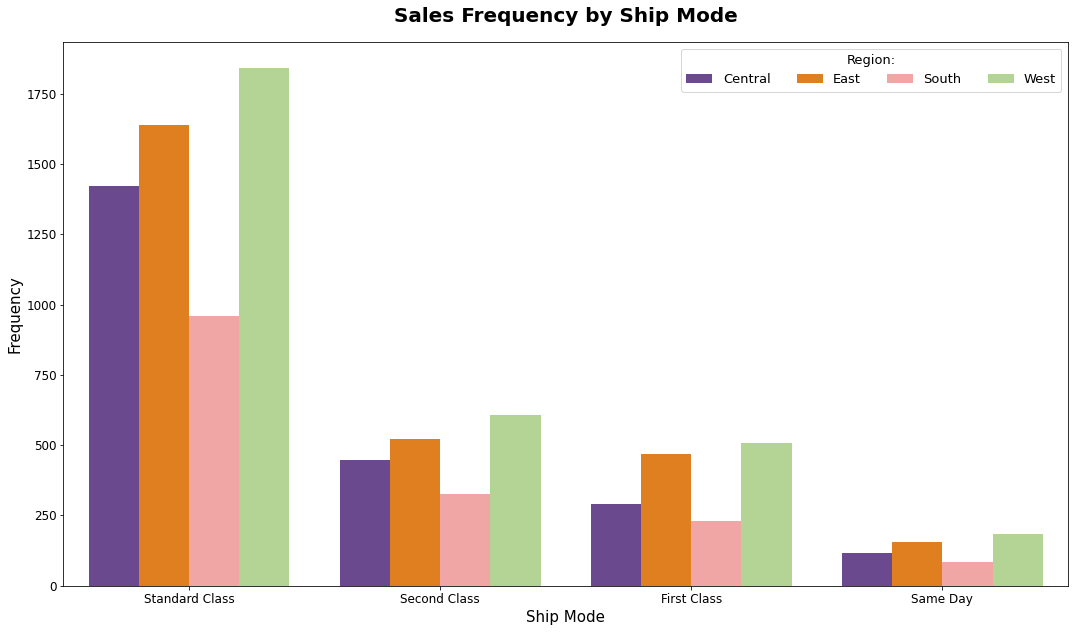

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

sns.countplot(x='Ship_Mode', data=df, hue='Region', palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Sales Frequency by Ship Mode', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Region:', title_fontsize=13, loc='upper right', ncol=4, fontsize=13)
ax.set_xlabel('Ship Mode', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

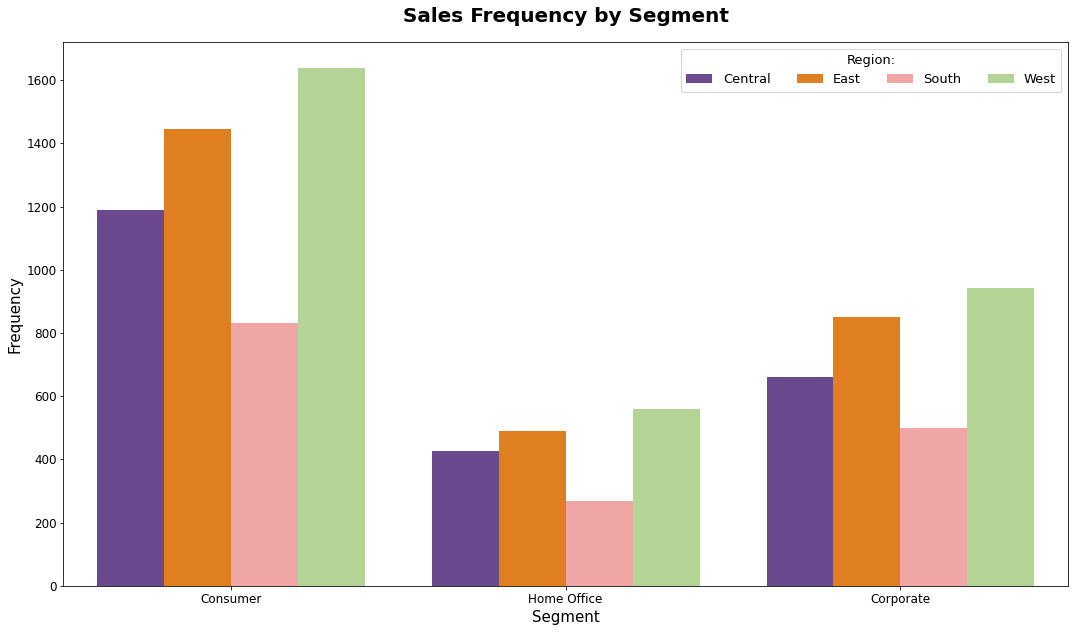

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

sns.countplot(x='Segment', data=df, hue='Region', palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Sales Frequency by Segment', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Region:', title_fontsize=13, loc='upper right', ncol=4, fontsize=13)
ax.set_xlabel('Segment', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

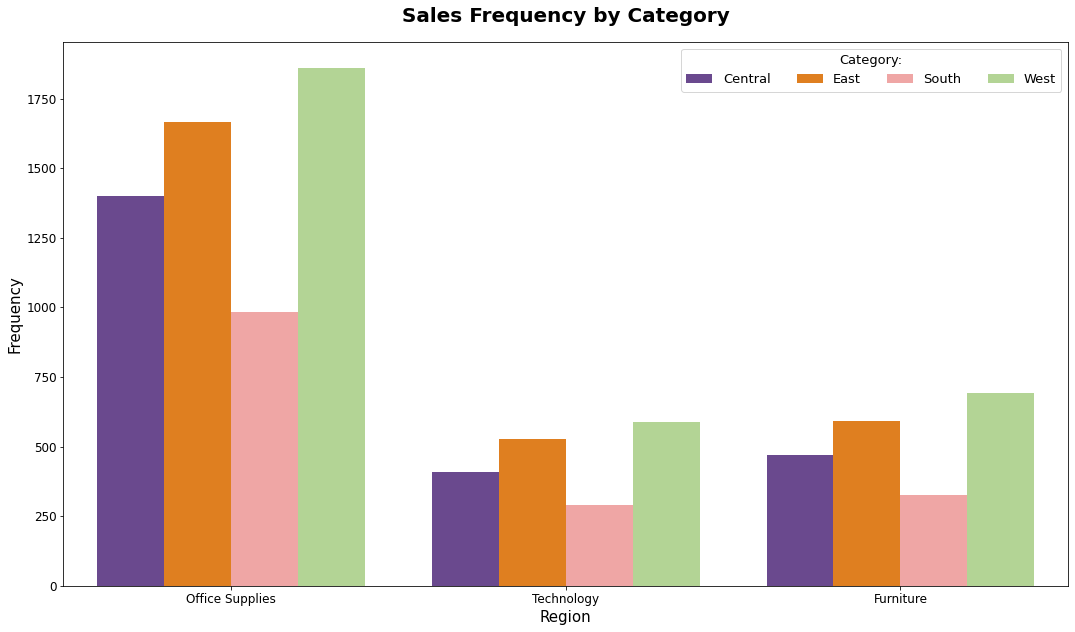

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

sns.countplot(x='Category', data=df, hue='Region', palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Sales Frequency by Category', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Category:', title_fontsize=13, loc='upper right', ncol=4, fontsize=13)
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

## Point Plot

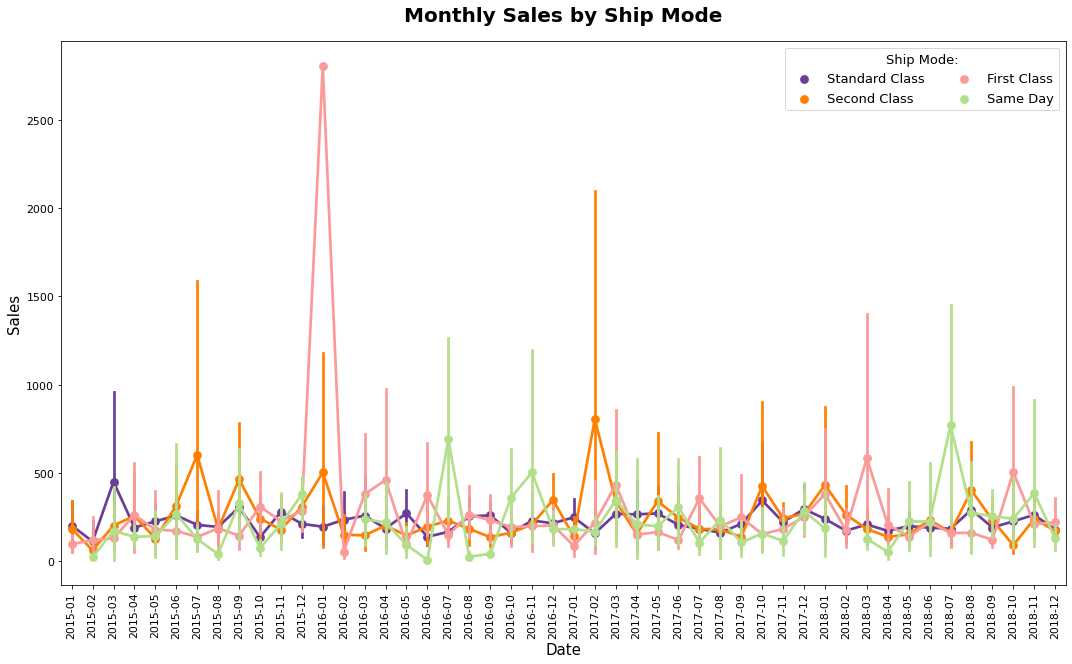

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.pointplot(x='Year_Month', y='Sales', hue='Ship_Mode', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Monthly Sales by Ship Mode', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Ship Mode:', title_fontsize=13, loc='upper right', ncol=2, fontsize=13)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

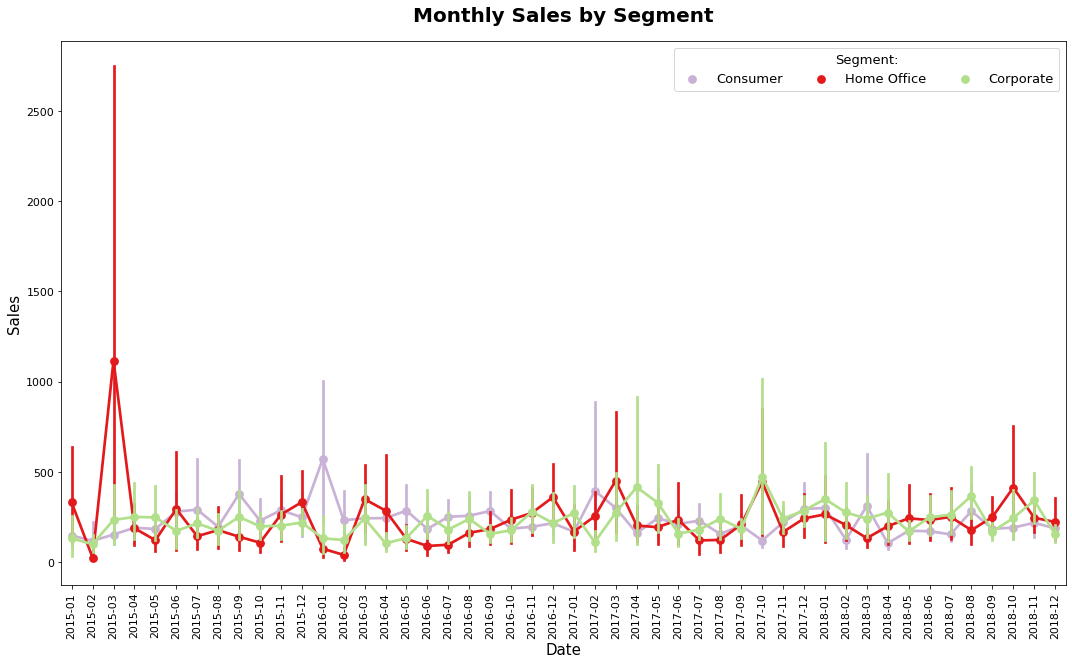

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.pointplot(x='Year_Month', y='Sales', hue='Segment', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Monthly Sales by Segment', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Segment:', title_fontsize=13, loc='upper right', ncol=3, fontsize=13)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

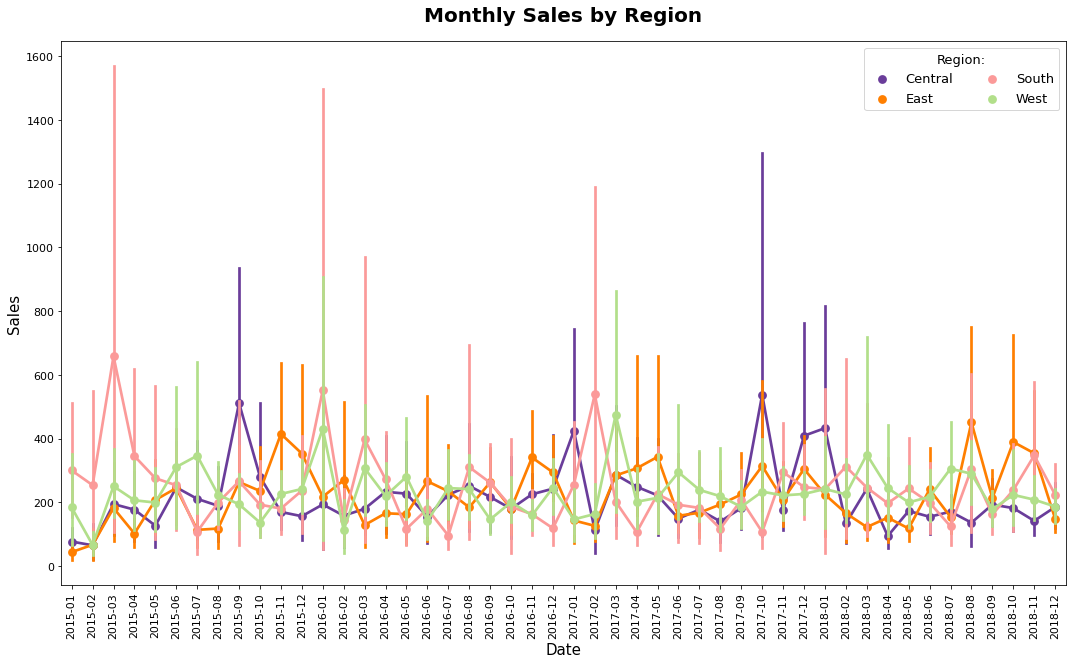

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.pointplot(x='Year_Month', y='Sales', hue='Region', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Monthly Sales by Region', fontsize=20, pad=20, color='black', weight='bold')
ax.legend(title='Region:', title_fontsize=13, loc='upper right', ncol=2, fontsize=13)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

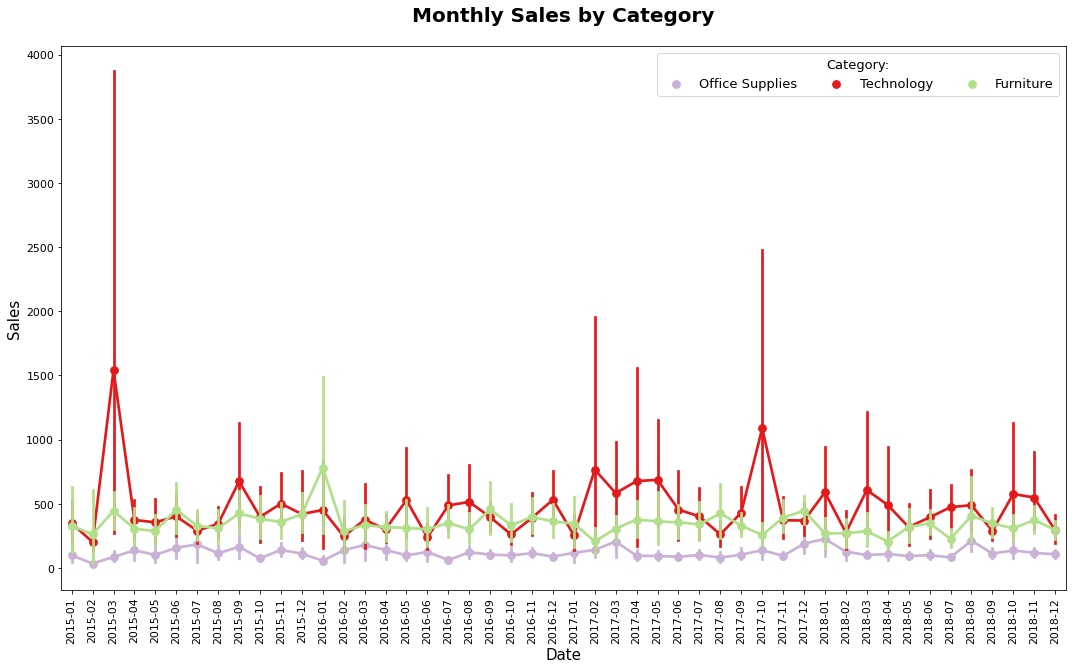

In [ ]:
# size of the point plot
fig, ax = plt.subplots(figsize=(18, 10))

# setting the point plot
sns.pointplot(x='Year_Month', y='Sales', hue='Category', data=df, palette='Paired_r')

# setting title, legend, labels and ticks
ax.set_title('Monthly Sales by Category', fontsize=20, pad=25, color='black', weight='bold')
ax.legend(title='Category:', title_fontsize=13, loc='upper right', ncol=3, fontsize=13)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

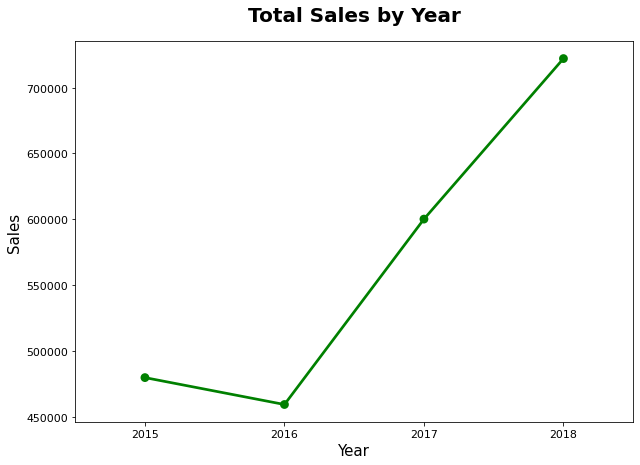

In [ ]:
# grouping dataset by year
group_year = pd.DataFrame(df.groupby(by=['Year']).sum())

# size of the point plot
plt.figure(figsize=(10, 7))

# setting the point plot
sns.pointplot(x=group_year.index, y='Sales', data=group_year, color='green')

# setting title, labels and ticks
plt.title('Total Sales by Year', fontsize=20, pad=20, color='black', weight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

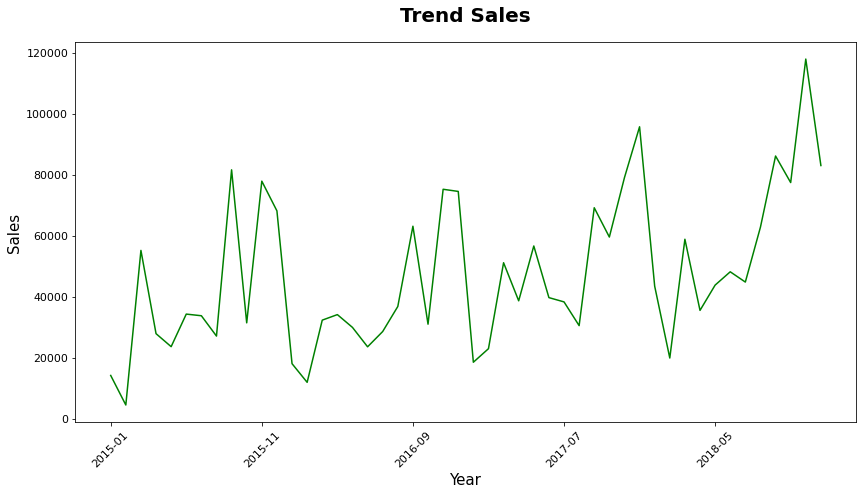

In [ ]:
# grouping dataset by year Year-Month by total Sales
group_year_month = pd.DataFrame(df.groupby(by=['Year_Month']).sum())['Sales']

# size of the point plot
plt.figure(figsize=(14, 7))

group_year_month.plot(kind='line', color='green')

# setting title, labels and ticks
plt.title('Trend Sales', fontsize=20, pad=20, color='black', weight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

<Figure size 720x504 with 0 Axes>

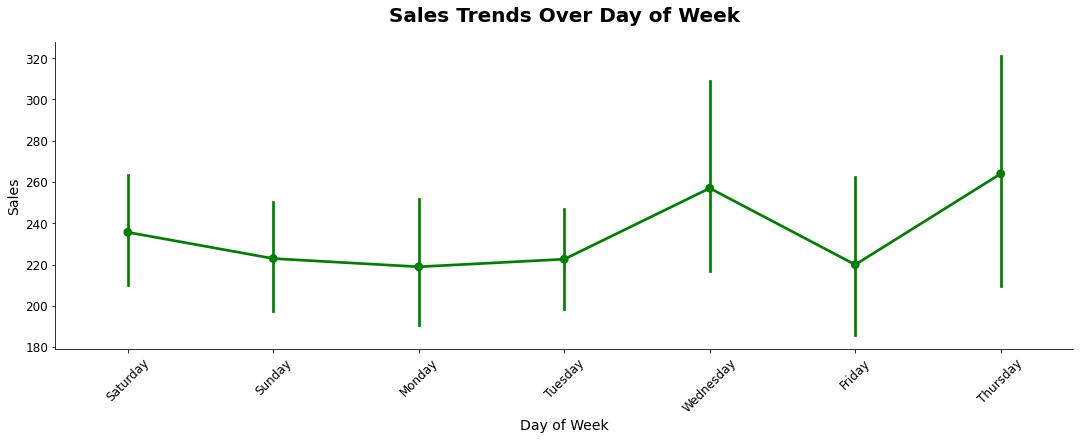

In [ ]:
# size of the point plot
plt.figure(figsize=(10, 7))

# setting the plot
sns.catplot(x='Day', y='Sales', data=df, kind='point', aspect=3, color='green')

# setting title, labels and ticks
plt.title('Sales Trends Over Day of Week', fontsize=20, pad=20, color='black', weight='bold')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.show()

## Heatmap

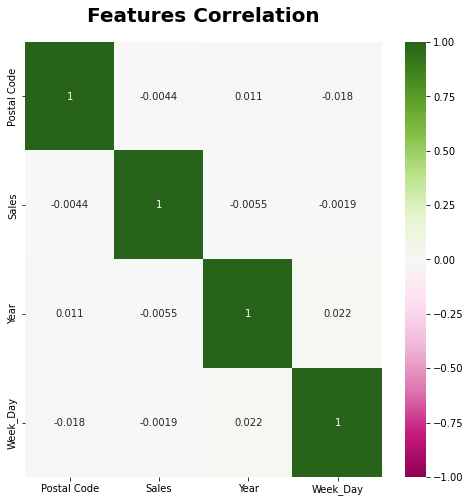

In [ ]:
# size plot
plt.figure(figsize=(8, 8))

# setting heatmap plot
heatmap = sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='PiYG')

# setting title
heatmap.set_title('Features Correlation', fontsize=20, color='black', weight='bold', pad=20)

# displaying plot
plt.show()

## Pair Plot

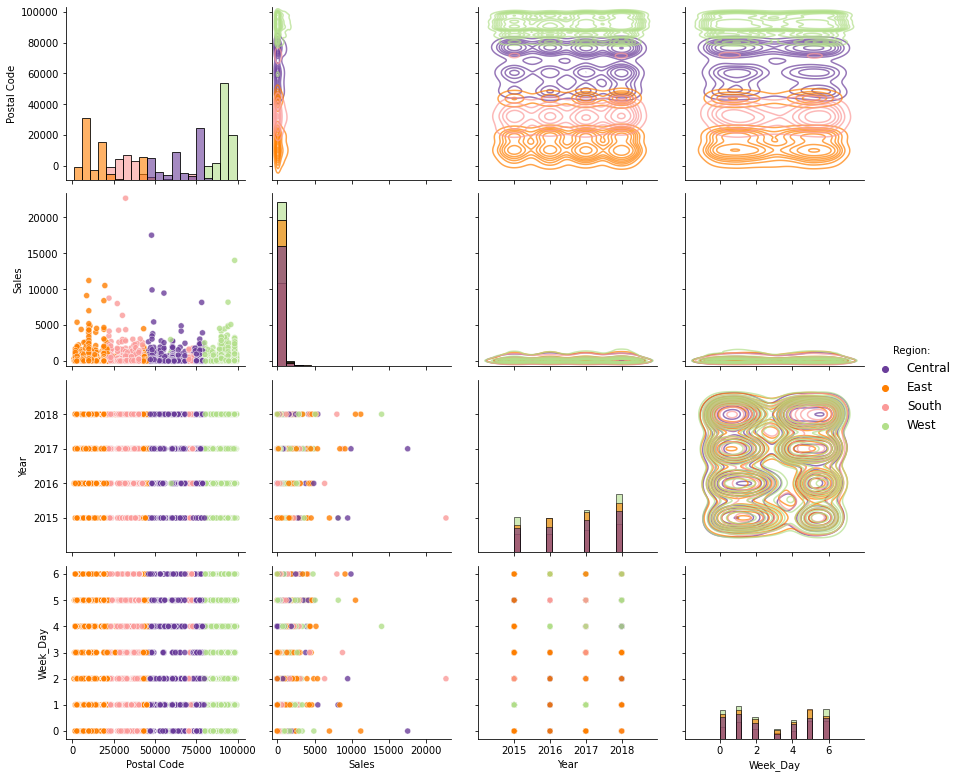

In [ ]:
# creating a PairGrid
pairgrid = sns.PairGrid(data=df, hue='Region', palette='Paired_r', size=3)

# setting a density plot to the upper triangle
pairgrid = pairgrid.map_upper(sns.kdeplot, alpha=0.7)

# setting a histogram to the diagonal
pairgrid = pairgrid.map_diag(sns.histplot, alpha=0.6, bins=20)

# setting a scatter plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.scatterplot, alpha=0.8)

# setting title and legend
pairgrid.fig.subplots_adjust(top=0.9)
pairgrid.add_legend(title='Region:', loc='center right', ncol=1, fontsize=12)

# displaying plot
plt.show()

## Histogram

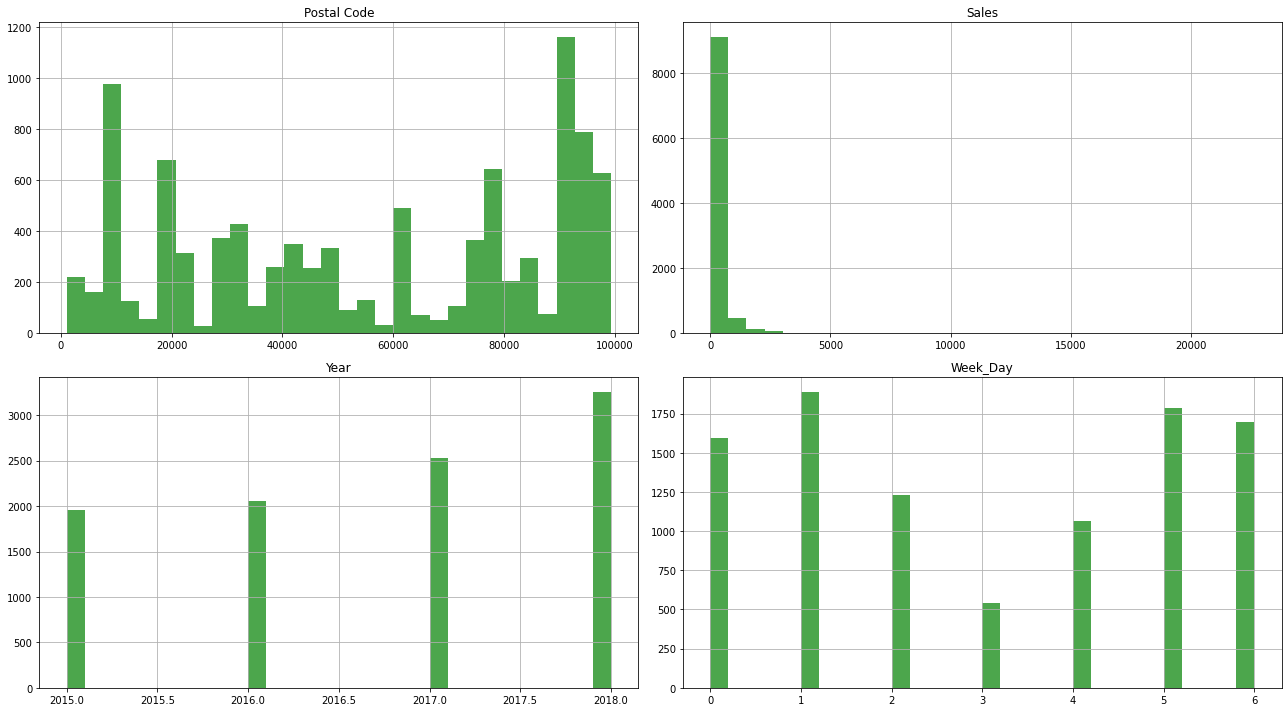

In [ ]:
# size plot
fig = plt.figure(figsize = (18,10))

# plotting all numeric variables
ax = fig.gca()

# setting histogram plots
df.hist(ax=ax, alpha=0.7, color='green', bins=30)

# displaying plot
plt.tight_layout()
plt.show()

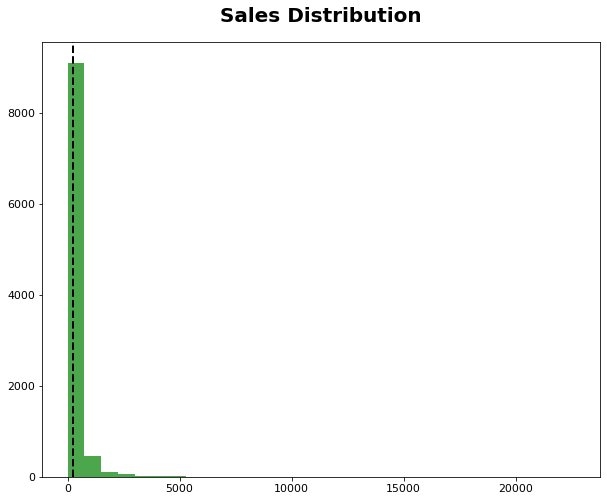

In [ ]:
# size plot
plt.figure(figsize=(10, 8))

# setting the histogram plot
plt.hist(df['Sales'], color='green', bins=30, alpha=0.7)

# calculating the mean of Sales
mean = df['Sales'].mean()

# setting the mean line
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)

# setting title, labels and ticks
plt.title('Sales Distribution', fontsize=20, color='black', weight='bold', pad=20)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

## Box Plot

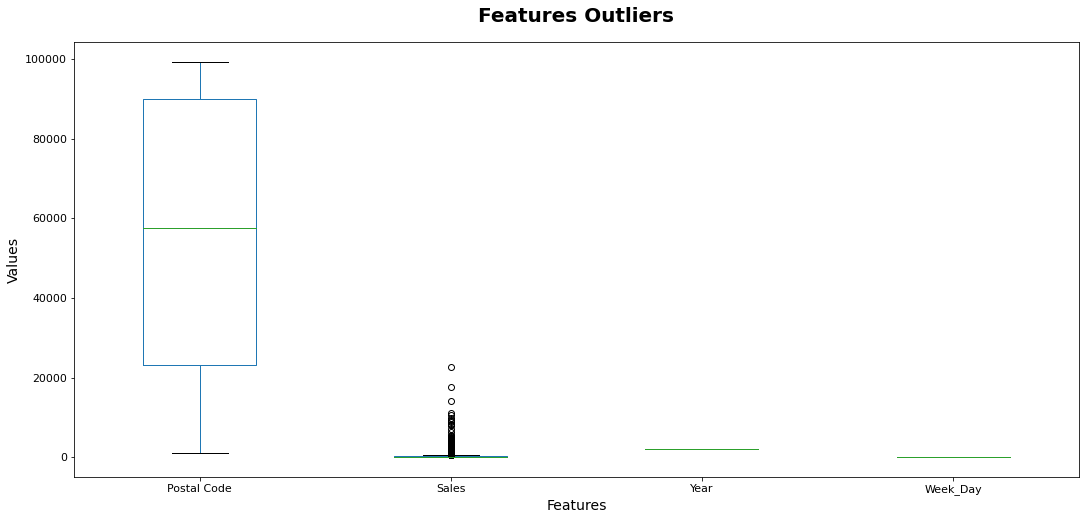

In [ ]:
# setting the box plot
df.plot(kind='box', vert=True, figsize=(18, 8))

# setting title, labels and ticks
plt.title('Features Outliers', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

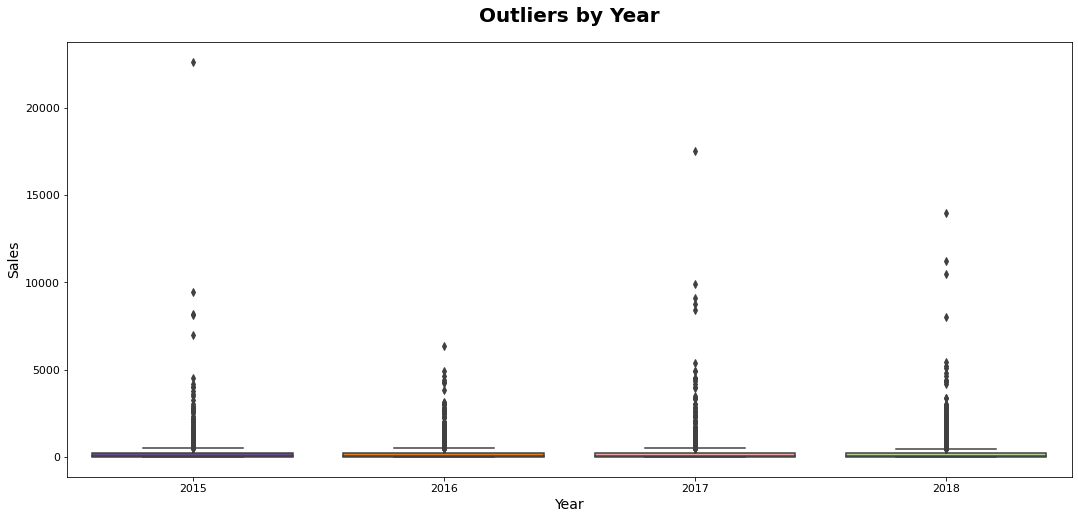

In [ ]:
# plot size
plt.figure(figsize=(18, 8))

# setting the box plot
sns.boxplot(x='Year', y='Sales', data=df, palette='Paired_r')

# setting title, labels and ticks
plt.title('Outliers by Year', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

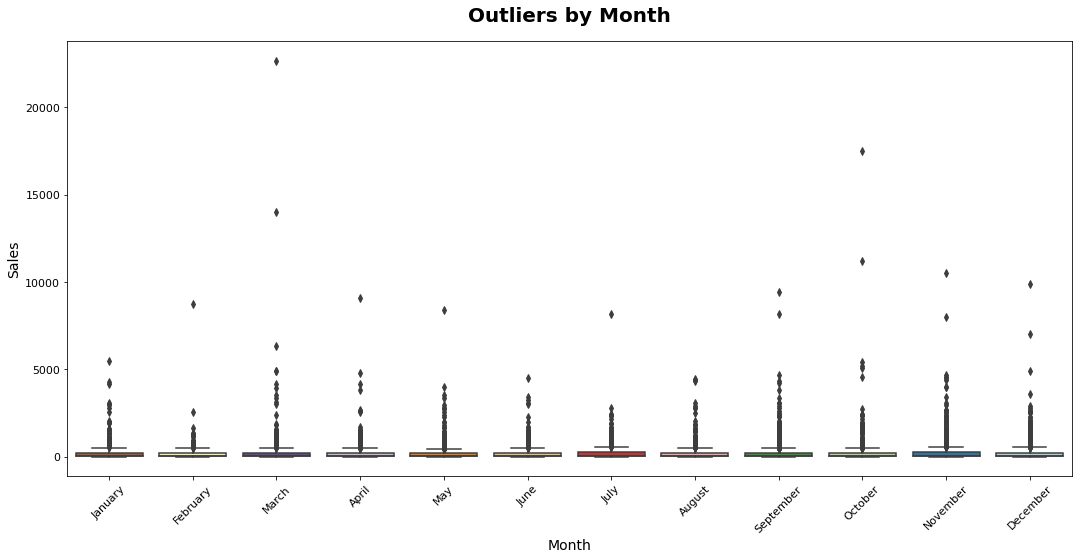

In [ ]:
# plot size
plt.figure(figsize=(18, 8))

# setting the box plot
sns.boxplot(x='Month', y='Sales', data=df, palette='Paired_r')

# setting title, labels and ticks
plt.title('Outliers by Month', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

# Times Series

In [ ]:
# loading required libraries
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

## ARMA Model

### Preparing Data

In [ ]:
# creating a subset with targeted features to apply the model
df_sales = df[['Order_Date', 'Sales']]
df_sales

,Order_Date,Sales
7980,2015-01-03,16.448
741,2015-01-04,3.540
740,2015-01-04,272.736
739,2015-01-04,11.784
1759,2015-01-05,19.536
...,...,...
1297,2018-12-30,20.720
906,2018-12-30,323.136
645,2018-12-30,209.300
908,2018-12-30,52.776


In [ ]:
# setting 'Order_Date' feature as index of the subset
df_sales.set_index('Order_Date', inplace = True)
df_sales

,Sales
Order_Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


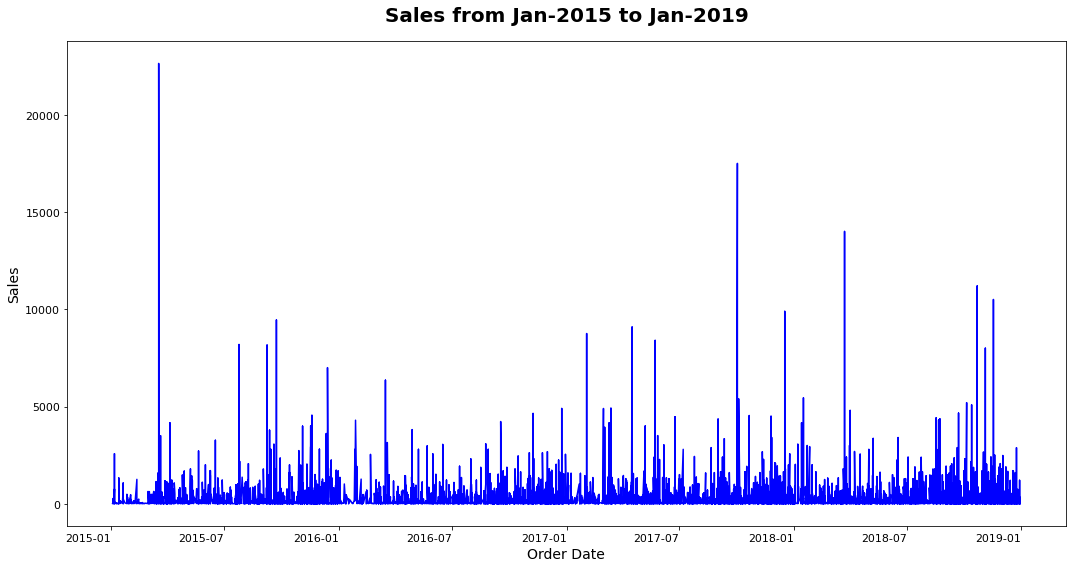

In [ ]:
# plotting the sales distribution of the subset
df_sales.Sales.plot(figsize=(15,8), color='blue')

# setting title, labels and ticks
plt.title('Sales from Jan-2015 to Jan-2019', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

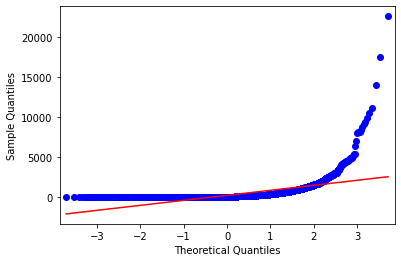

In [ ]:
# loading required library
import statsmodels.api as sm

# Q-Q plot of the quantiles of X versus the quantiles/ppf of a distribution
x = sm.qqplot(df_sales['Sales'], line = 's')

# displaying plot
plt.show()

### Stationarity

In [ ]:
# preparing subset for stationarity check
df_sales =  pd.DataFrame(df_sales['Sales'].resample('D').mean())
# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear')

In [ ]:
# comparing the change in mean and variance over time, splitting the data into train, test and validate
train, test, validate = np.split(df_sales['Sales'].sample(frac=1), [int(.6*len(df_sales['Sales'])),int(.8*len(df_sales['Sales']))])

In [ ]:
# displaying train, test and validate data
print('Train Dataset:')
print(train)
print('\nTest Dataset:')
print(test)
print('\nValidate Dataset:')
print(validate)

Train Dataset:
Order_Date
2015-08-08    304.279154
2015-12-11    331.689406
2017-04-14    293.314400
2017-07-24    163.482000
2015-01-05     19.536000
                 ...    
2016-11-30    119.893133
2015-06-27    205.380000
2018-01-04    471.307111
2015-07-09     29.502333
2017-06-28    109.644500
Name: Sales, Length: 874, dtype: float64

Test Dataset:
Order_Date
2017-06-21    144.277000
2018-01-08    892.980000
2017-05-21    388.316286
2015-01-27    142.223333
2016-07-28     49.566800
                 ...    
2017-09-16    106.471500
2015-12-18    154.581833
2017-07-03    211.925000
2018-10-12    330.905529
2015-09-22    155.033250
Name: Sales, Length: 292, dtype: float64

Validate Dataset:
Order_Date
2018-11-28    576.078667
2018-01-21    181.903071
2017-03-11    149.337000
2016-04-02     49.870000
2016-04-30    174.632778
                 ...    
2017-06-07     12.890500
2015-10-29    937.937333
2015-04-11    212.804444
2017-03-09    127.120000
2017-01-23    433.075000
Name: Sales

In [ ]:
# calculating the mean of train, test and validate data
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean()

# alculating the variance of train, test and validate data
variance1, variance2, variance3 = train.var(), test.var(), validate.var()

# Displaying mean and variance results
print('Mean1 = %f\nMean2 = %f\nMean3 = %f\n' % (mean1, mean2, mean3))
print('Variance1 = %f\nVariance2 = %f\nVariance3 = %f' % (variance1, variance2, variance3))

Mean1 = 221.348294
Mean2 = 229.080282
Mean3 = 219.501366

Variance1 = 75827.131017
Variance2 = 70710.727182
Variance3 = 61926.754377


In [ ]:
# calculating Dickey-Fuller Test
adf_results = adfuller(df_sales.Sales)

# displaying adf_sales results, minor adf_sales, number of lags, p-value and critical values
print('\nAdf_sales Results = ', adf_results)
print('\nAdf_sales = ', str(adf_results[0]))
print('\np-value = ', str(adf_results[1]))
print('\nLags Number: ', adf_results[2])
print('\nCritical Values:\n')

# loop to display p-value (1%, 5% and 10%) and their respective values
for key, val in adf_results[4].items(): 
    print(key,':',val)    
    if adf_results[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary.\n')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary.\n')


Adf_sales Results =  (-20.80945851483934, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

Adf_sales =  -20.80945851483934

p-value =  0.0

Lags Number:  2

Critical Values:

1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary.

5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary.

10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary.



### ACF and PACF

In [ ]:
# plotting ACF and PACF
def plotds(xt, nlag = 30, fig_size = (15, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series', fontsize=20, color='black', weight='bold', pad=20)
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

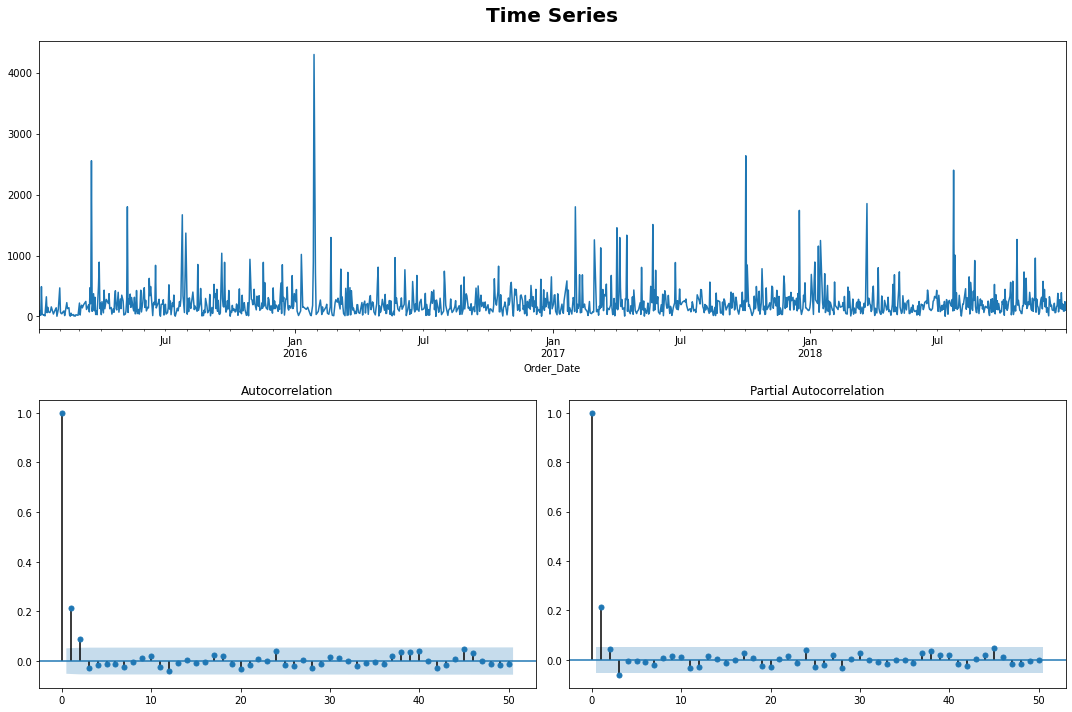

In [ ]:
# displaying plot of the distribution of data, ACF and PACF
plotds(df_sales['Sales'], nlag = 5000)

### AIC

In [ ]:
# loop to calculate the AIC values
arma_aicVal = []
for ari in range(1, 3):
    for maj in range(0, 3):
        arma_obj = smtsa.ARMA(df_sales.Sales.tolist(), order = (ari, maj)).fit(maxlag = 30, method = 'mle', trend = 'nc')
        arma_aicVal.append([ari, maj, arma_obj.aic])
print(arma_aicVal)  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


[[1, 0, 20720.47861291848], [1, 1, 20456.13219019944], [1, 2, 20398.888839617917], [2, 0, 20632.314613257593], [2, 1, 20389.842900648597], [2, 2, 20389.91214659807]]


**Minimum AIC = [2, 1, 20389.842900648597]**

### Model

In [ ]:
# training ARMA model on the Sales data
arma_model = smtsa.ARMA(df_sales.Sales.tolist(), order = (2, 1)).fit(maxlag = 30, method='mle', trend='nc') 

# predicting the model
df_sales['ARMA'] = arma_model.predict()

# displaying the model summary
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:                     ARMA(2, 1)   Log Likelihood              -10190.921
Method:                           mle   S.D. of innovations            262.085
Date:                Sat, 11 Dec 2021   AIC                          20389.843
Time:                        11:09:05   BIC                          20410.982
Sample:                             0   HQIC                         20397.729
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.2142   2.26e-06   5.37e+05      0.000       1.214       1.214
ar.L2.y       -0.2142   2.17e-06  -9.87e+04      0.000      -0.214      -0.214
ma.L1.y       -0.9996   1.55e-05  -6.46e+04      0.000      -1.000      -1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            4.6691           +0.0000j            4.6691            0.0000
MA.1            1.0004           +0.0000j            1.0004            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# checking ARMA predicted values
df_sales.ARMA

Order_Date
2015-01-03      0.000000
2015-01-04      8.575425
2015-01-05     43.274352
2015-01-06     22.905500
2015-01-07    190.735053
                 ...    
2018-12-26    200.006442
2018-12-27    218.493170
2018-12-28    193.802695
2018-12-29    193.382878
2018-12-30    226.773572
Freq: D, Name: ARMA, Length: 1458, dtype: float64

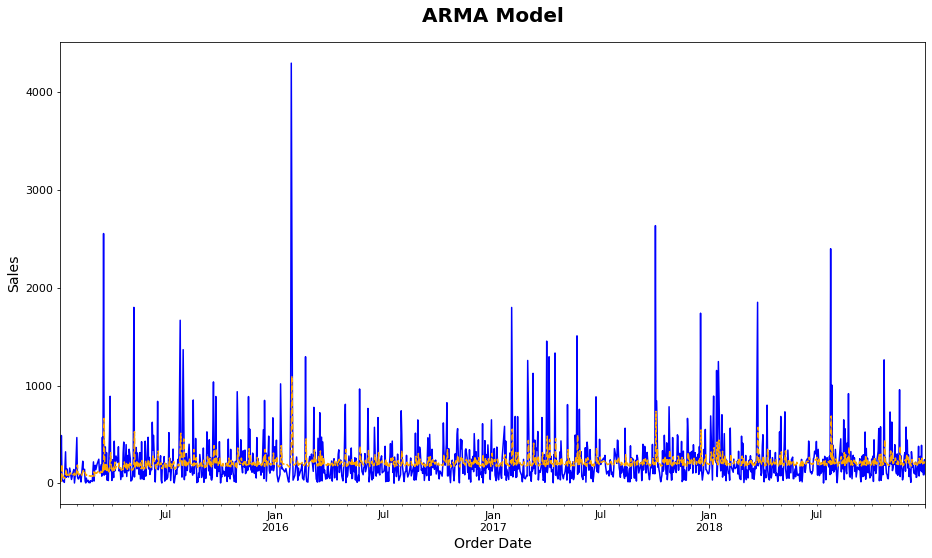

In [ ]:
# setting plot
fig, axarr = plt.subplots(1, sharex = True)
fig.set_size_inches(15.5, 8.5)
df_sales['Sales'].iloc[1:].plot(color = 'blue', linestyle = '-', ax = axarr)
df_sales['ARMA'].iloc[1:].plot(color = 'orange', linestyle = '--', ax = axarr)

# setting title, labels and ticks
plt.title('ARMA Model', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.show()

## SAMIRA Model

### Preparing Data

In [ ]:
# creating a subset with targeted features to apply the model
df_sales = df[['Order_Date', 'Sales']]
df_sales

,Order_Date,Sales
7980,2015-01-03,16.448
741,2015-01-04,3.540
740,2015-01-04,272.736
739,2015-01-04,11.784
1759,2015-01-05,19.536
...,...,...
1297,2018-12-30,20.720
906,2018-12-30,323.136
645,2018-12-30,209.300
908,2018-12-30,52.776


In [ ]:
# setting 'Order_Date' feature as index of the subset
df_sales.set_index('Order_Date', inplace = True)
df_sales

,Sales
Order_Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


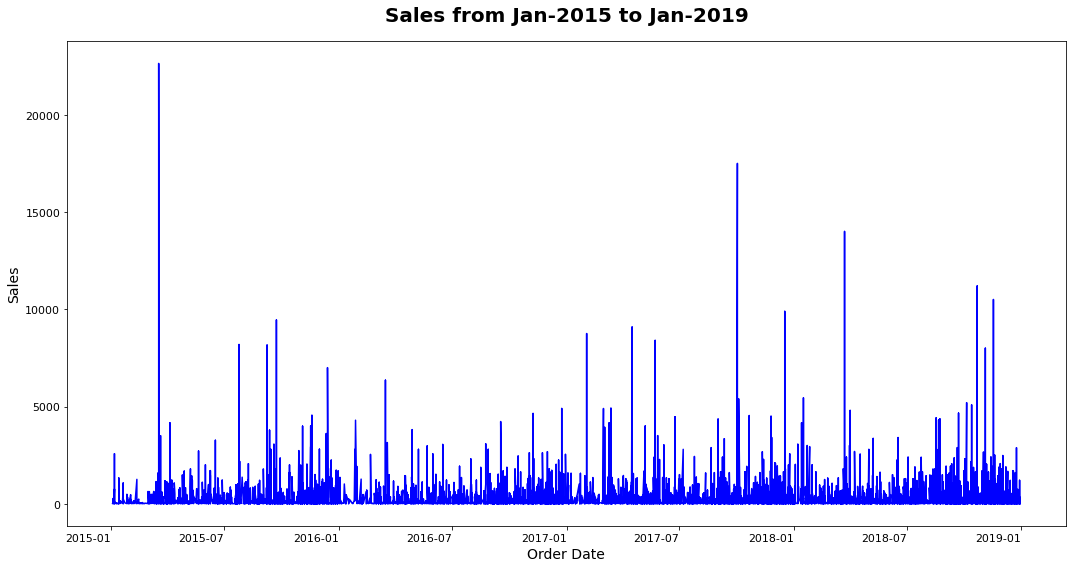

In [ ]:
# plotting the sales distribution of the subset
df_sales.Sales.plot(figsize=(15,8), color='blue')

# setting title, labels and ticks
plt.title('Sales from Jan-2015 to Jan-2019', fontsize=20, color='black', weight='bold', pad=20)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# displaying plot
plt.tight_layout()
plt.show()

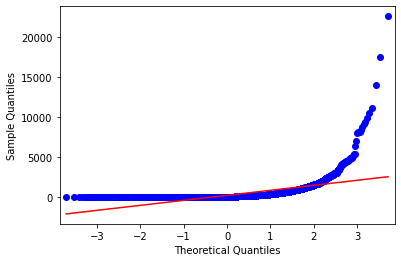

In [ ]:
# loading required library
import statsmodels.api as sm

# Q-Q plot of the quantiles of X versus the quantiles/ppf of a distribution
x = sm.qqplot(df_sales['Sales'], line = 's')

# displaying plot
plt.show()

### Stationarity

In [ ]:
# preparing subset for stationarity check
df_sales =  pd.DataFrame(df_sales['Sales'].resample('D').mean())
# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear')

In [ ]:
# comparing the change in mean and variance over time, splitting the data into train, test and validate
train, test, validate = np.split(df_sales['Sales'].sample(frac=1), [int(.6*len(df_sales['Sales'])),int(.8*len(df_sales['Sales']))])

In [ ]:
# displaying train, test and validate data
print('Train Dataset:')
print(train)
print('\nTest Dataset:')
print(test)
print('\nValidate Dataset:')
print(validate)

Train Dataset:
Order_Date
2017-02-23     57.576000
2016-02-17     44.379000
2018-08-17    559.840471
2015-12-14    849.073111
2016-07-28     49.566800
                 ...    
2018-01-15    267.535000
2016-09-15    181.132143
2016-08-13     97.816000
2016-12-23    194.320000
2015-04-07    204.234000
Name: Sales, Length: 874, dtype: float64

Test Dataset:
Order_Date
2016-08-09    286.964235
2018-09-04    191.435786
2015-08-28    231.098679
2016-07-16    432.769429
2015-07-13    351.216000
                 ...    
2015-08-23     56.522400
2017-12-28    121.771667
2017-05-22    224.900000
2016-11-10    442.113000
2017-03-17    337.190571
Name: Sales, Length: 292, dtype: float64

Validate Dataset:
Order_Date
2015-07-15      4.755000
2017-11-11    260.226105
2015-08-08    304.279154
2017-06-21    144.277000
2016-04-08    217.075600
                 ...    
2017-01-20    502.680375
2017-02-18     94.415333
2017-04-24    321.420000
2015-03-29    890.841000
2018-02-13    151.204286
Name: Sales

In [ ]:
# calculating the mean of train, test and validate data
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean()

# alculating the variance of train, test and validate data
variance1, variance2, variance3 = train.var(), test.var(), validate.var()

# Displaying mean and variance results
print('Mean1 = %f\nMean2 = %f\nMean3 = %f\n' % (mean1, mean2, mean3))
print('Variance1 = %f\nVariance2 = %f\nVariance3 = %f' % (variance1, variance2, variance3))

Mean1 = 226.443615
Mean2 = 198.172705
Mean3 = 235.157878

Variance1 = 78870.255019
Variance2 = 37431.667751
Variance3 = 85331.563995


In [ ]:
# calculating Dickey-Fuller Test
adf_results = adfuller(df_sales.Sales)

# displaying adf_sales results, minor adf_sales, number of lags, p-value and critical values
print('\nAdf_sales Results = ', adf_results)
print('\nAdf_sales = ', str(adf_results[0]))
print('\np-value = ', str(adf_results[1]))
print('\nLags Number: ', adf_results[2])
print('\nCritical Values:\n')

# loop to display p-value (1%, 5% and 10%) and their respective values
for key, val in adf_results[4].items(): 
    print(key,':',val)    
    if adf_results[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary.\n')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary.\n')


Adf_sales Results =  (-20.80945851483934, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

Adf_sales =  -20.80945851483934

p-value =  0.0

Lags Number:  2

Critical Values:

1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary.

5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary.

10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary.



### Decomposing Data 

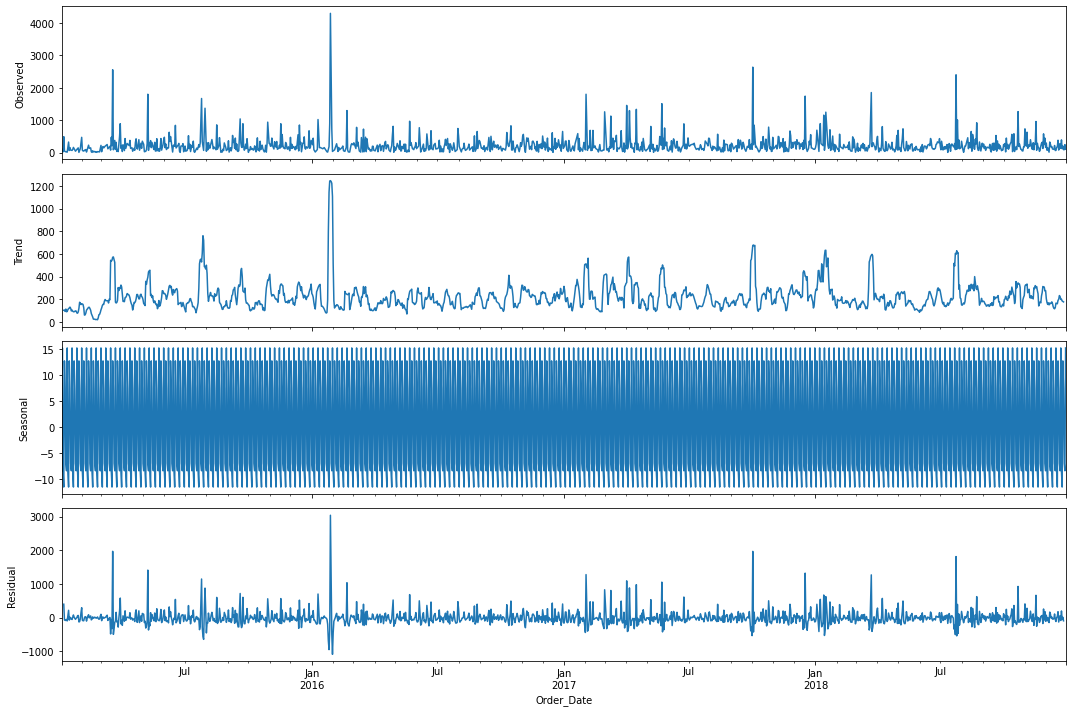

In [ ]:
# loading required libraries
from pylab import rcParams
import statsmodels.api as sm

# plot size
rcParams['figure.figsize'] = 15, 10

# decomposing time series data into trend and seasonality
decomposition = sm.tsa.seasonal_decompose(df_sales['Sales'], model='additive')

# setting plot
fig = decomposition.plot()

# displaying plot
plt.show();

### AIC

In [ ]:
# loading required library
import itertools

p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))

# a loop for creating combinations of seasonal parameters of SARIMA model
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

# displaying results
print('Parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# loop to calculate the AIC values
for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_sales,
                                            order = parameters,
                                            seasonal_param_order = seasonal_param,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('SARIMA {} x {}12 - AIC: {}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA (0, 0, 0) x (0, 0, 0, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (0, 0, 1, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (0, 1, 0, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (0, 1, 1, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (1, 0, 0, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (1, 0, 1, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (1, 1, 0, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 0) x (1, 1, 1, 12)12 - AIC: 21194.720419683938
SARIMA (0, 0, 1) x (0, 0, 0, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (0, 0, 1, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (0, 1, 0, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (0, 1, 1, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (1, 0, 0, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (1, 0, 1, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (1, 1, 0, 12)12 - AIC: 20882.284066808217
SARIMA (0, 0, 1) x (1, 1, 1, 12)12 - AIC: 20882.284066808217
SARIMA (0, 1, 0) x (0, 0

### Model

In [ ]:
# applying and training SARIMA model
sarima_model = SARIMAX(df_sales['Sales'], order = (1, 1, 1), seasonal_order = (1, 0, 1, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit(disp = 0)

# displaying model summary
print(sarima_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                 1458
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -10089.258
Date:                            Sat, 11 Dec 2021   AIC                          20188.515
Time:                                    11:09:22   BIC                          20214.888
Sample:                                01-03-2015   HQIC                         20198.359
                                     - 12-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2132      0.011     20.255      0.000       0.193       0.234
ma.L1         -1.0000      1.263   

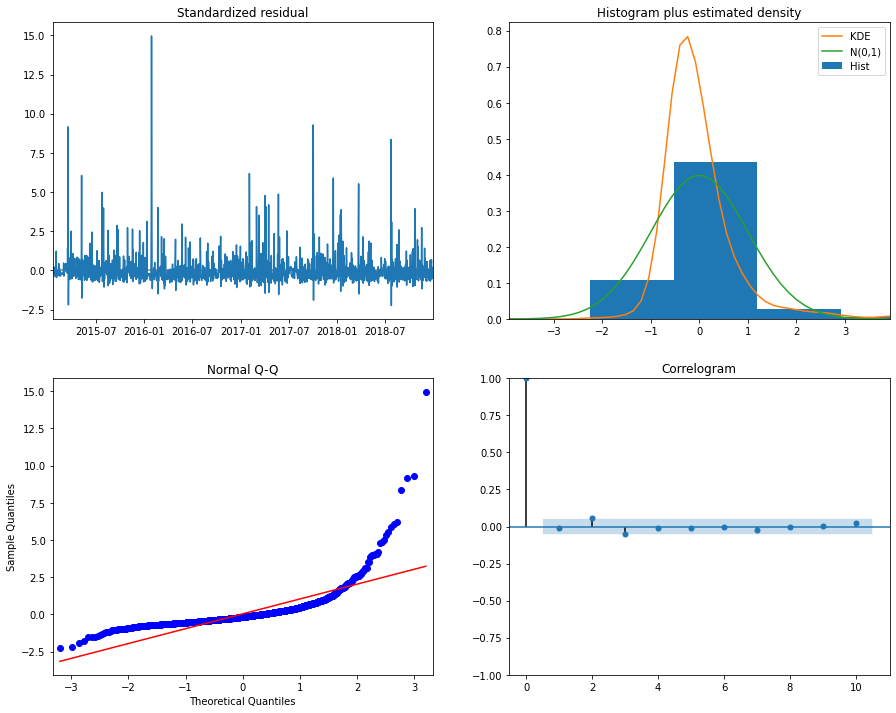

In [ ]:
# diagnosing the model residuals
sarima_model.plot_diagnostics(figsize = (15, 12))
plt.show()

### Model Evaluation

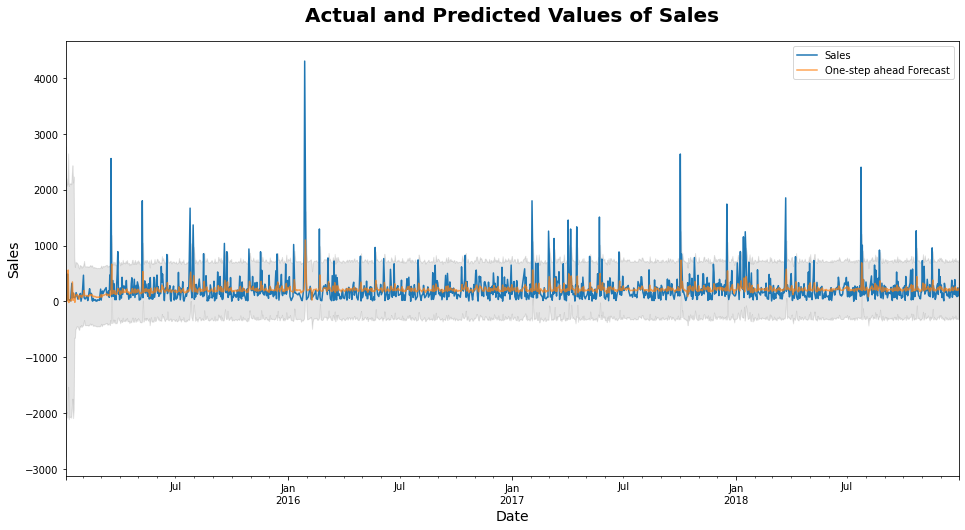

In [ ]:
# variable to display plot for predicted values
sarima_pred = sarima_model.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False)
sarima_pred_val = sarima_pred.conf_int()

# displaying plot for original values
ax = df_sales['2014':].plot(label='observed')

# displaying plot for predicted values
sarima_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 8))
ax.fill_between(sarima_pred_val.index,
                sarima_pred_val.iloc[:, 0],
                sarima_pred_val.iloc[:, 1], color='k', alpha=.1)


# setting title, labels and ticks
ax.set_title('Actual and Predicted Values of Sales', fontsize=20, color='black', weight='bold', pad=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
plt.legend()

# displaying plot
plt.show()

In [ ]:
# loading required libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculating the root mean squared error
sarima_y_pred = sarima_pred.predicted_mean
sarima_y_actual = df_sales['Sales']
sarima_mse = mean_squared_error(sarima_y_pred, sarima_y_actual)
sarima_rmse = sqrt(sarima_mse)

# displaying the root mean squared error of the forecast with rounding it up to 2 decimals
print('The Mean Squared Error: {}'.format(round(sarima_rmse, 2)))

The Mean Squared Error: 262.54


In [ ]:
# predicting 30 days later of the last date in the Order Date column
sarima_forecast = sarima_model.forecast(steps = 30)

# displaying the sales forecast with rounding it up to 2 decimals
print((round(sarima_forecast, 2)))

2018-12-31    191.50
2019-01-01    223.90
2019-01-02    222.95
2019-01-03    220.09
2019-01-04    226.39
2019-01-05    215.16
2019-01-06    226.80
2019-01-07    223.89
2019-01-08    227.80
2019-01-09    227.79
2019-01-10    222.07
2019-01-11    228.20
2019-01-12    225.52
2019-01-13    222.13
2019-01-14    223.07
2019-01-15    223.84
2019-01-16    222.53
2019-01-17    224.92
2019-01-18    222.46
2019-01-19    223.07
2019-01-20    222.24
2019-01-21    222.25
2019-01-22    223.46
2019-01-23    222.16
2019-01-24    222.73
2019-01-25    223.45
2019-01-26    223.25
2019-01-27    223.08
2019-01-28    223.36
2019-01-29    222.85
Freq: D, dtype: float64


# Apriori Model


In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Exploring the columns of the data
df.columns


Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Year_Month', 'Year', 'Month', 'Day', 'Week_Day'],
      dtype='object')

In [ ]:
# The of the data

df.shape

(9800, 21)

In [ ]:
# Checkign whether there is any null values of not

df.isnull().values.any()

False

In [ ]:
# Exploring the different regions of transactions
df.State.unique()


array(['Texas', 'Illinois', 'Pennsylvania', 'Kentucky', 'California',
       'Georgia', 'Virginia', 'Delaware', 'Louisiana', 'Ohio',
       'South Carolina', 'Oregon', 'Arizona', 'Arkansas', 'Michigan',
       'Tennessee', 'Nevada', 'South Dakota', 'New York', 'Wisconsin',
       'Florida', 'Washington', 'New Jersey', 'Missouri', 'Indiana',
       'North Carolina', 'Colorado', 'Utah', 'Mississippi', 'Minnesota',
       'Iowa', 'New Mexico', 'Massachusetts', 'Alabama', 'Montana',
       'Idaho', 'Maryland', 'Connecticut', 'New Hampshire', 'Oklahoma',
       'Nebraska', 'Maine', 'Kansas', 'Rhode Island',
       'District of Columbia', 'Vermont', 'Wyoming', 'North Dakota',
       'West Virginia'], dtype=object)

## By State

### Washington

In [ ]:
# Transactions done in Washington
basket_Washington = (df[df['State'] =="Washington"]
          .groupby(['Order_ID', 'Sub_Category'])['Sales']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order_ID'))


In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

# Encoding the datasets
basket_encoded = basket_Washington.applymap(hot_encode)
basket_Washington = basket_encoded




In [ ]:
basket_Washington.head()

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order_ID,,,,,,,,,,,,,,,,,
CA-2015-101392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
CA-2015-102085,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
CA-2015-103660,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CA-2015-103940,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
CA-2015-104269,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Building the model
frq_items = apriori(basket_Washington, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


  antecedents consequents  antecedent support  ...      lift  leverage  conviction
3   (Storage)   (Binders)            0.169291  ...  1.165851  0.008401    1.076209
0     (Paper)   (Binders)            0.200787  ...  1.114035  0.006851    1.051181
1   (Binders)     (Paper)            0.299213  ...  1.114035  0.006851    1.029494
2   (Binders)   (Storage)            0.299213  ...  1.165851  0.008401    1.034981

[4 rows x 9 columns]


### New York


In [ ]:
# Transactions done in New York
basket_NY = (df[df['State'] =="New York"]
          .groupby(['Order_ID', 'Sub_Category'])['Sales']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order_ID'))


In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

# Encoding the datasets
basket_encoded = basket_NY.applymap(hot_encode)
basket_NY = basket_encoded




In [ ]:
basket_NY.head()

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order_ID,,,,,,,,,,,,,,,,,
CA-2015-100006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CA-2015-100328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2015-100391,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
CA-2015-101364,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2015-101476,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Building the model
frq_items = apriori(basket_NY, min_support = 0.01, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


              antecedents consequents  ...  leverage  conviction
156     (Labels, Storage)     (Paper)  ...  0.010685    6.844607
108  (Fasteners, Storage)   (Binders)  ...  0.006878    2.881170
71     (Accessories, Art)   (Binders)  ...  0.006367    2.160878
107  (Binders, Fasteners)   (Storage)  ...  0.008095    2.106947
154       (Paper, Labels)   (Storage)  ...  0.010601    1.966484

[5 rows x 9 columns]


### Florida


In [ ]:
# Transactions done in Florida
basket_FL = (df[df['State'] =="Florida"]
          .groupby(['Order_ID', 'Sub_Category'])['Sales']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order_ID'))


In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

# Encoding the datasets
basket_encoded = basket_FL.applymap(hot_encode)
basket_FL = basket_encoded




In [ ]:
basket_FL.head()

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order_ID,,,,,,,,,,,,,,,,,
CA-2015-100293,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
CA-2015-101770,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2015-103317,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
CA-2015-103989,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
CA-2015-106810,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Building the model
frq_items = apriori(basket_FL, min_support = 0.01, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


                     antecedents   consequents  ...  leverage  conviction
92            (Bookcases, Paper)  (Appliances)  ...  0.009276         inf
102            (Binders, Chairs)         (Art)  ...  0.013064         inf
132            (Chairs, Storage)         (Art)  ...  0.008709         inf
220    (Binders, Phones, Chairs)         (Art)  ...  0.008709         inf
236  (Binders, Furnishings, Art)      (Phones)  ...  0.008452         inf

[5 rows x 9 columns]
